<img src="https://drive.google.com/uc?id=1DvKhAzLtk-Hilu7Le73WAOz2EBR5d41G" width="500"/>

---


### ***Name***: [*Xiaoye Zhang*]
### ***username***: [*acse-xz4019*]
### ***CID***: [*01702739*]

### Dataset exploration

**Visualization helps in understanding the data distribution and verifying data augmentation or preprocessing steps.**

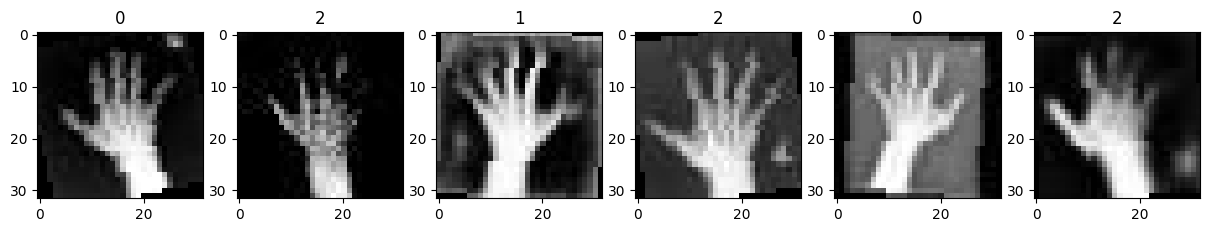

In [ ]:
# Plot sample images
set_seed(42)
idxs = torch.randint(low=0, high=len(trainset), size=(6,))
fig, axs = plt.subplots(1, 6, figsize=(15, 5))
for i, idx in enumerate((idxs)):
    img, target = trainset[idx]
    axs[i].imshow(img[0], cmap="gray")
    axs[i].set_title(str(int(target)))

#### 0 refers to real hands images, 1 refers to VAE-generated hands, 2 refers to GAN-generated hands
- It is clear that the quality of GAN-generated hands is better than VAE-generated hands

# Hyperparameters set 1

In [ ]:
batch_size = 32
# large learning rates might cause the model to diverge
learning_rate = 0.00005 

# The use of Adam optimizer and CrossEntropyLoss is standard for classification tasks.
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

**Do some image augumentations first; the use of normalization, random flipping, and rotation as augmentation techniques helps in making the model more robust to variations in the input data.**

In [ ]:
transform = transforms.Compose([transforms.Normalize(mean=(0.5), std=(0.5)),    # Normalize the images
                                transforms.RandomHorizontalFlip(p=0.4),         # Randomly flip the images
                                transforms.RandomRotation(15),])                # Randomly rotate the images
real_hands = TrainHandDataset(root='./real_hands/',label=0, transform=transform)
GAN_hands = TrainHandDataset(root='./GAN_hands/', label=2, transform=transform)
VAE_hands = TrainHandDataset(root='./VAE_hands/', label=1, transform=transform)

# Concatenate the datasets
combined_dataset = ConcatDataset([real_hands, GAN_hands, VAE_hands])
trainset, testset = train_test_split(combined_dataset, test_size=0.2, random_state=42)
trainset, valset = train_test_split(trainset, test_size=0.2, random_state=42)

## Try ResNet
**ResNet stands out in classifiers for its ability to train deep networks efficiently, overcoming the vanishing gradient problem and offering remarkable accuracy and adaptability in image classification tasks.**

### ResNet34
ResNet-34 from `Deep Residual Learning for Image Recognition <https://arxiv.org/abs/1512.03385>`

**The ResNet34 model is initialized with 3 classes. The learning rate and batch size are adjusted, possibly to fine-tune the model. The model summary provides an overview of the model's architecture and the number of parameters, which is helpful for understanding the model's complexity and resource requirements.**

In [ ]:
model = resnet34(num_classes=3)
batch_size = 16
learning_rate = 0.001
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
sum = summary(model, input_size=(1, 32, 32))

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            3,136
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  36,864
|    |    └─BatchNorm2d: 3-2             128
|    |    └─ReLU: 3-3                    --
|    |    └─Conv2d: 3-4                  36,864
|    |    └─BatchNorm2d: 3-5             128
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  36,864
|    |    └─BatchNorm2d: 3-7             128
|    |    └─ReLU: 3-8                    --
|    |    └─Conv2d: 3-9                  36,864
|    |    └─BatchNorm2d: 3-10            128
|    └─BasicBlock: 2-3                   --
|    |    └─Conv2d: 3-11                 36,864
|    |    └─BatchNorm2d: 3-12            128
|    |    └─ReLU: 3-13                   -

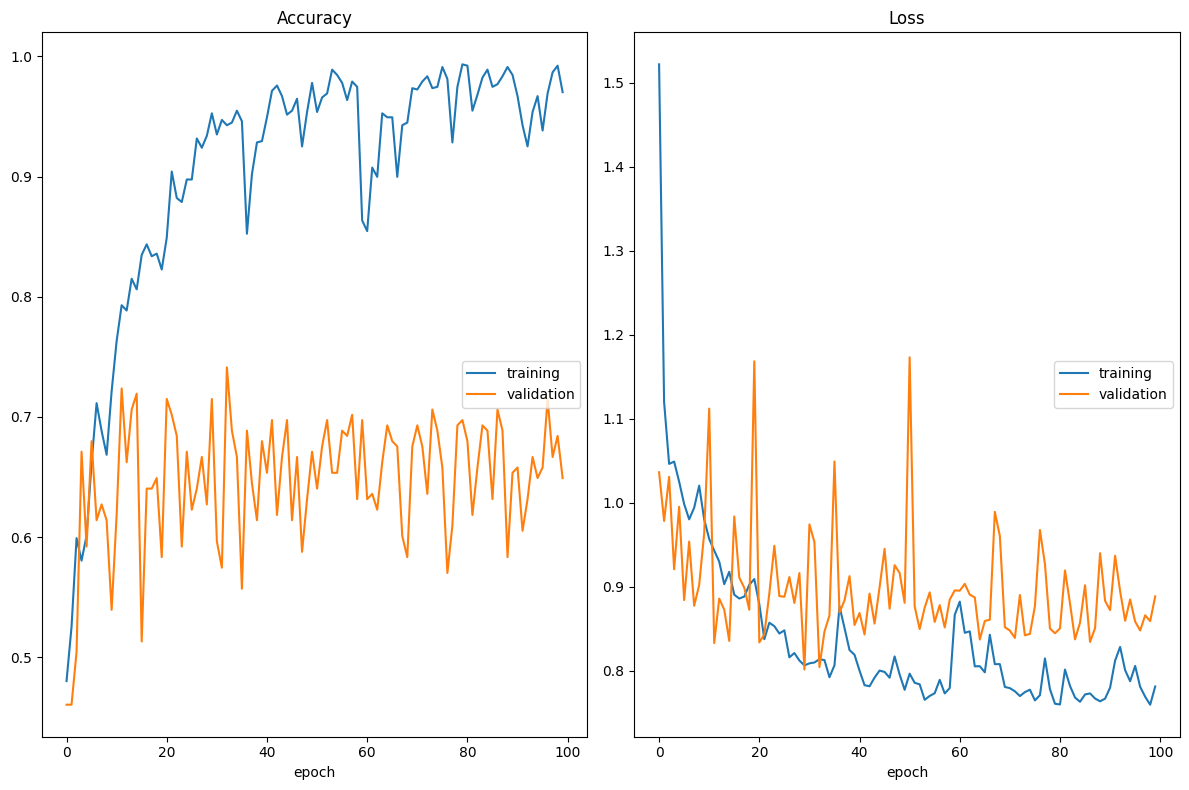

100%|██████████| 100/100 [02:41<00:00,  1.61s/it]

Accuracy
	training         	 (min:    0.480, max:    0.993, cur:    0.970)
	validation       	 (min:    0.461, max:    0.741, cur:    0.649)
Loss
	training         	 (min:    0.760, max:    1.522, cur:    0.781)
	validation       	 (min:    0.802, max:    1.173, cur:    0.889)


In [ ]:
# a custom training function, indicating a streamlined and modular approach to training
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)

**The confusion matrix is a critical tool for evaluating the model's performance, as it provides insights into the types of errors the model is making. It is clear that major classification is correct, but overall accuracy is not good.**

Test loss: 0.8449 | Test accuracy: 0.7053


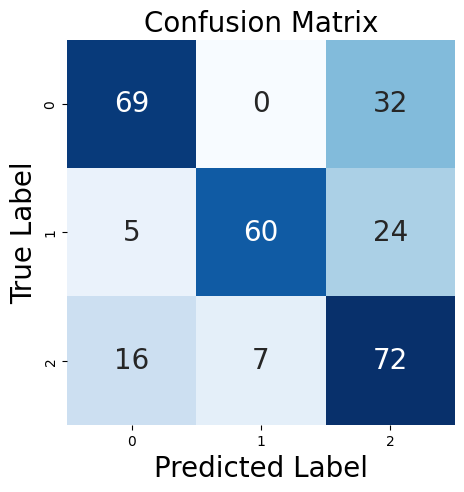

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

### ResNet50
ResNet-50 from `Deep Residual Learning for Image Recognition <https://arxiv.org/abs/1512.03385>`

In [ ]:
model = resnet50(num_classes=3)
batch_size = 64
learning_rate = 0.00005
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
summ = summary(resnet50, torch.Size((1,32,32)))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 16, 16]          3,136
├─BatchNorm2d: 1-2                       [-1, 64, 16, 16]          128
├─ReLU: 1-3                              [-1, 64, 16, 16]          --
├─MaxPool2d: 1-4                         [-1, 64, 8, 8]            --
├─Sequential: 1-5                        [-1, 64, 8, 8]            --
|    └─BasicBlock: 2-1                   [-1, 64, 8, 8]            --
|    |    └─Conv2d: 3-1                  [-1, 64, 8, 8]            36,864
|    |    └─BatchNorm2d: 3-2             [-1, 64, 8, 8]            128
|    |    └─ReLU: 3-3                    [-1, 64, 8, 8]            --
|    |    └─Conv2d: 3-4                  [-1, 64, 8, 8]            36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 8, 8]            128
|    |    └─ReLU: 3-6                    [-1, 64, 8, 8]            --
|    └─BasicBlock: 2-2                   [-1, 64, 8, 8]            --
|

c:\Users\wasd1\miniconda3\envs\introduction-to-python\lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


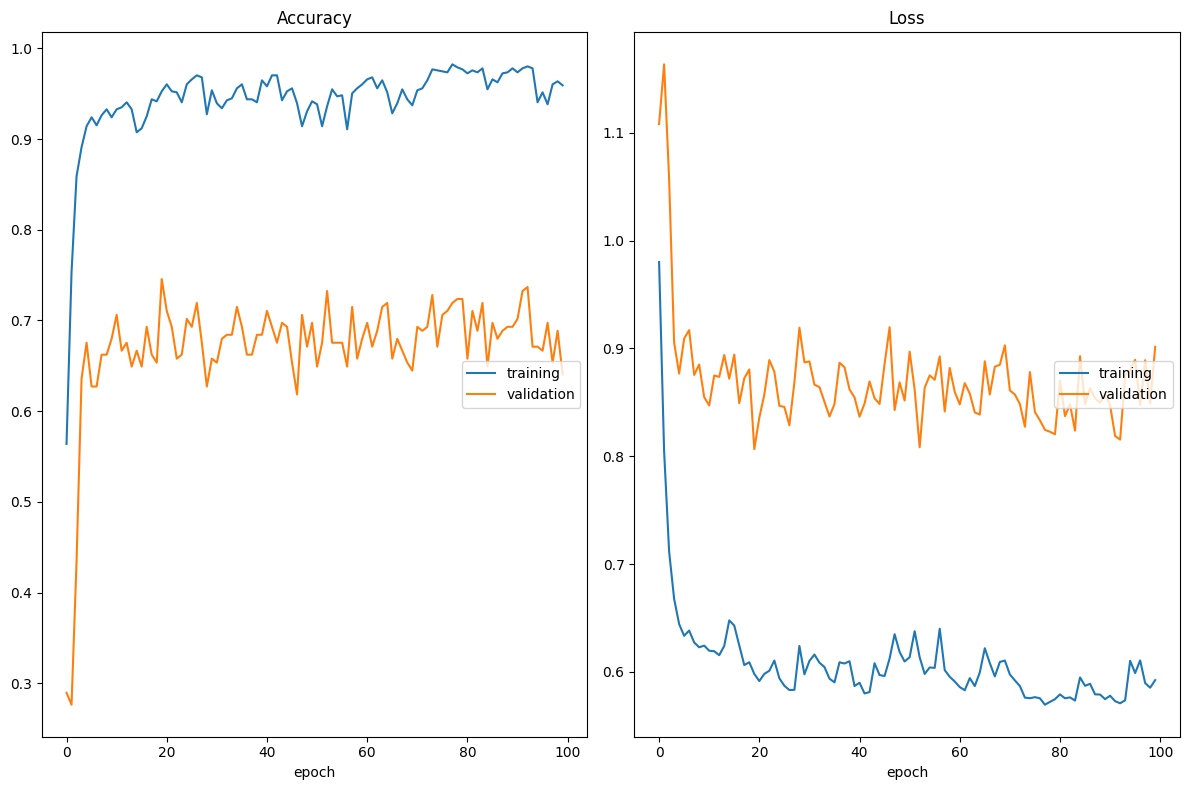

100%|██████████| 100/100 [01:03<00:00,  1.58it/s]

Accuracy
	training         	 (min:    0.564, max:    0.982, cur:    0.959)
	validation       	 (min:    0.276, max:    0.746, cur:    0.640)
Loss
	training         	 (min:    0.570, max:    0.980, cur:    0.592)
	validation       	 (min:    0.807, max:    1.163, cur:    0.902)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)

Test loss: 0.7807 | Test accuracy: 0.7649


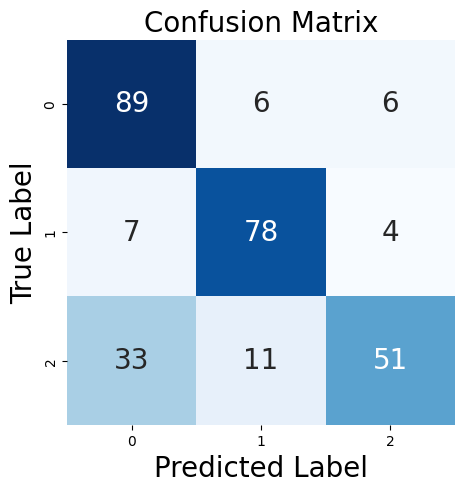

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

### ResNet152
ResNet-152 from `Deep Residual Learning for Image Recognition <https://arxiv.org/abs/1512.03385>`

In [ ]:
model = resnet152(num_classes=3)
batch_size = 64
learning_rate = 0.00005
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
summ = summary(resnet152, torch.Size((1,32,32)))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 16, 16]          3,136
├─BatchNorm2d: 1-2                       [-1, 64, 16, 16]          128
├─ReLU: 1-3                              [-1, 64, 16, 16]          --
├─MaxPool2d: 1-4                         [-1, 64, 8, 8]            --
├─Sequential: 1-5                        [-1, 256, 8, 8]           --
|    └─Bottleneck: 2-1                   [-1, 256, 8, 8]           --
|    |    └─Conv2d: 3-1                  [-1, 64, 8, 8]            4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 8, 8]            128
|    |    └─ReLU: 3-3                    [-1, 64, 8, 8]            --
|    |    └─Conv2d: 3-4                  [-1, 64, 8, 8]            36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 8, 8]            128
|    |    └─ReLU: 3-6                    [-1, 64, 8, 8]            --
|    |    └─Conv2d: 3-7                  [-1, 256, 8, 8]           16,38

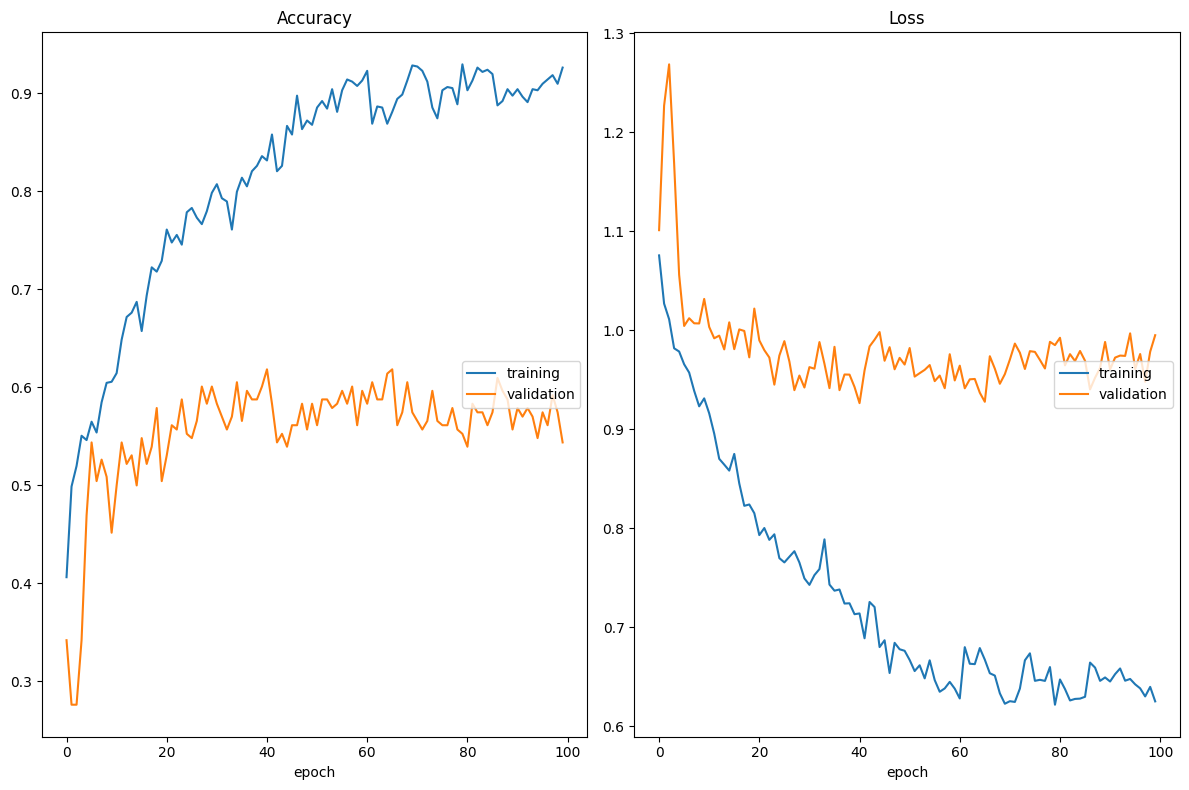

Accuracy
	training         	 (min:    0.406, max:    0.930, cur:    0.926)
	validation       	 (min:    0.276, max:    0.618, cur:    0.544)
Loss
	training         	 (min:    0.622, max:    1.076, cur:    0.625)
	validation       	 (min:    0.926, max:    1.269, cur:    0.995)


100%|██████████| 100/100 [03:01<00:00,  1.82s/it]


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)

Test loss: 0.8840 | Test accuracy: 0.6596


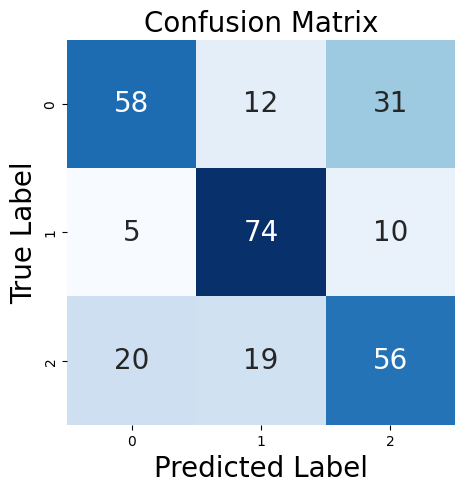

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

#### Conclusion:
**It seems ResNet may not suitable for the job. The low validation accuracy and high accuracy loss are both trapped indicates the model are overfitiing or the gradient is too small because the network is too deep. I tried different version of ResNet50 (e.g., add softmax layers, add dropout layers, change the layer size in the middle). But the best performance for validation accuracy is still under 80%. It can be concluded that shallow networks may be more suitable.**

## RegNet
RegNet from `RegNet: Self-Regulated Network for Image Classification <https://arxiv.org/abs/2101.00590>`
https://github.com/TrevorIkky/RegNet

**RegNet is a neural network combines RNN and ResNet, aims to prevent the loss of information that extracted from the previous block.**

In [ ]:
model = regnet()
batch_size = 64
learning_rate = 0.00005
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
sum = summary(model, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 16, 16]          576
├─BatchNorm2d: 1-2                       [-1, 64, 16, 16]          128
├─ReLU: 1-3                              [-1, 64, 16, 16]          --
├─MaxPool2d: 1-4                         [-1, 64, 8, 8]            --
├─Sequential: 1-5                        [-1, 64, 8, 8]            --
|    └─RegNetBlock: 2-1                  [-1, 64, 8, 8]            --
|    |    └─Conv2d: 3-1                  [-1, 64, 8, 8]            36,864
|    |    └─BatchNorm2d: 3-2             [-1, 64, 8, 8]            128
|    |    └─ReLU: 3-3                    [-1, 64, 8, 8]            --
|    |    └─Conv2d: 3-4                  [-1, 64, 8, 8]            36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 8, 8]            128
|    |    └─ReLU: 3-6                    [-1, 64, 8, 8]            --
|    └─RegNetBlock: 2-2                  [-1, 64, 8, 8]            --
|  

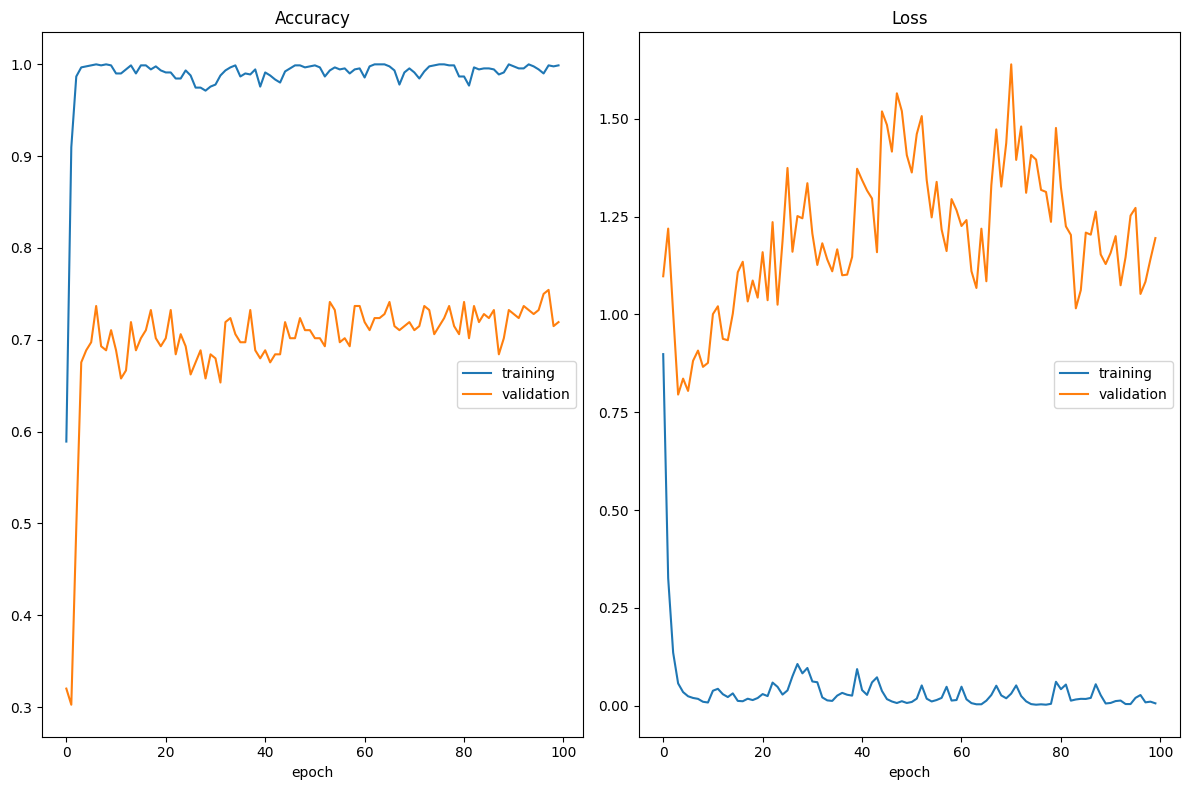

100%|██████████| 100/100 [00:49<00:00,  2.03it/s]

Accuracy
	training         	 (min:    0.589, max:    1.000, cur:    0.999)
	validation       	 (min:    0.303, max:    0.754, cur:    0.719)
Loss
	training         	 (min:    0.003, max:    0.899, cur:    0.006)
	validation       	 (min:    0.795, max:    1.639, cur:    1.195)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)

Test loss: 1.4436 | Test accuracy: 0.7439


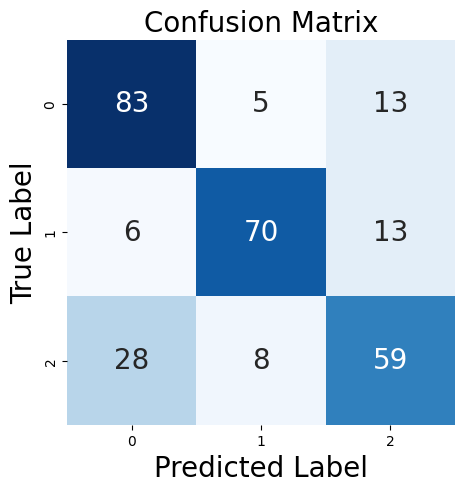

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

#### Conclusion:
**Look like RegNet faces the same problem as ResNet, the too deep network may not be helpful for such low number of data.**

# Hyperparameters set 2

- **remove normalization**
- **add regularisation term**: aimed at stabilizing the training process

In [ ]:
def regularizer(logits, arg):
    """"Stabilizing Training of Generative Adversarial Networks through Regularization <https://arxiv.org/abs/1705.09367>"""

    # Calculate gradients for real and fake data
    grad_logits = logits.requires_grad_()
    # Calculate the norms of the gradients
    grad_logits_norm = torch.norm(grad_logits.view(grad_logits.size(0), -1), dim=1)

    # Compute regularizer terms
    reg = torch.mean(torch.square(grad_logits_norm))

    return reg

### ResNet34
**Not much improvement**

In [ ]:
model = resnet34(num_classes=3)

batch_size = 16
learning_rate = 0.001
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

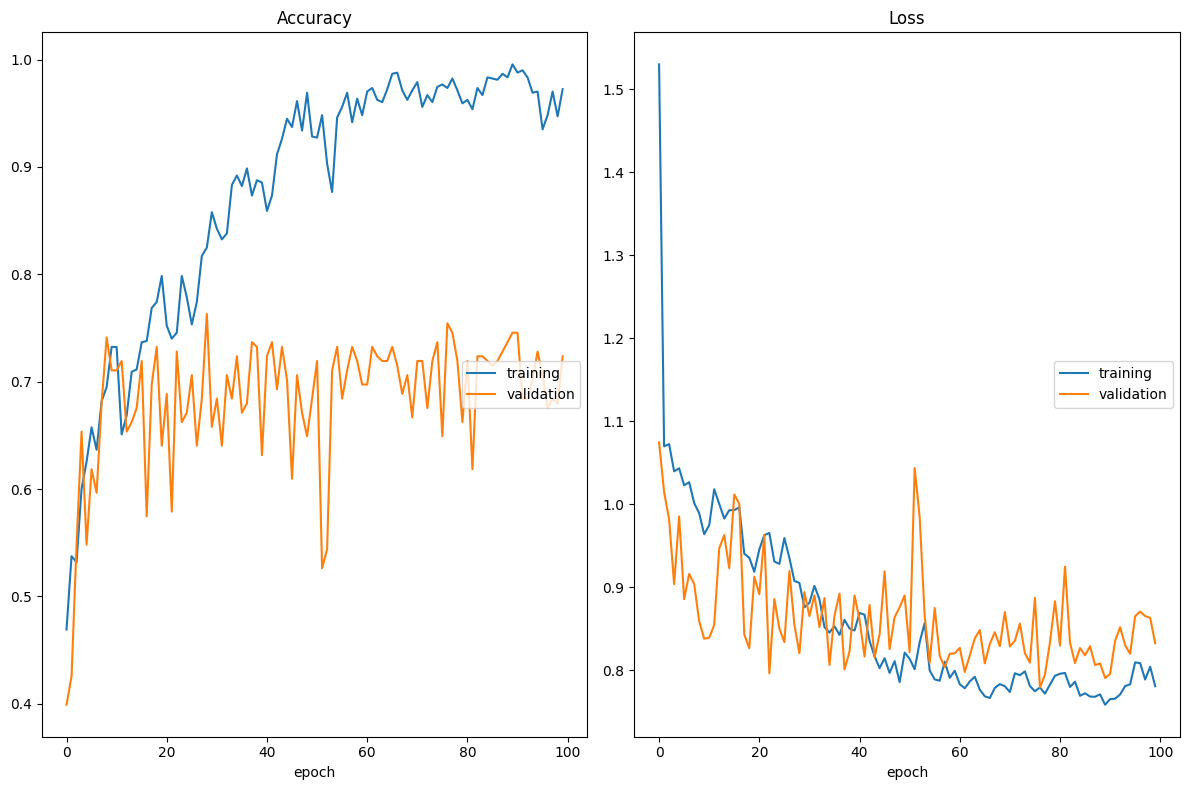

100%|██████████| 100/100 [02:37<00:00,  1.58s/it]

Accuracy
	training         	 (min:    0.469, max:    0.996, cur:    0.972)
	validation       	 (min:    0.399, max:    0.763, cur:    0.724)
Loss
	training         	 (min:    0.759, max:    1.530, cur:    0.781)
	validation       	 (min:    0.779, max:    1.074, cur:    0.833)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)

Test loss: 0.8038 | Test accuracy: 0.7368


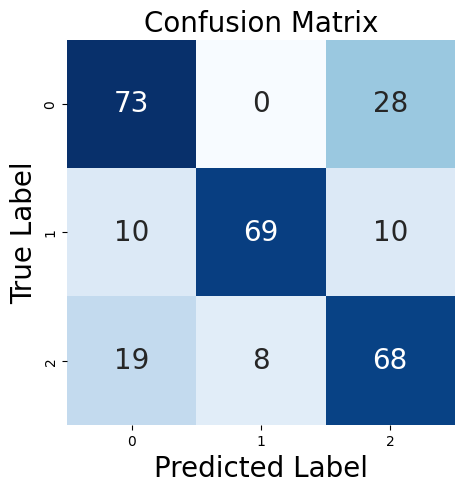

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

## Try Simple CNN
#### Since I found complex models performs bad, I was thinking of design a relative simple model.

### First simple CNN
`https://chat.openai.com/share/ff6de297-8d76-4e66-b322-c6afdc4fba9e`

In [ ]:
model = SimpleCNN()
batch_size = 16
learning_rate = 0.001
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
sum = summary(model, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 32, 32]          160
├─Conv2d: 1-2                            [-1, 32, 32, 32]          4,640
├─MaxPool2d: 1-3                         [-1, 32, 16, 16]          --
├─Conv2d: 1-4                            [-1, 64, 16, 16]          18,496
├─Conv2d: 1-5                            [-1, 128, 16, 16]         73,856
├─MaxPool2d: 1-6                         [-1, 128, 8, 8]           --
├─Linear: 1-7                            [-1, 256]                 2,097,408
├─Linear: 1-8                            [-1, 3]                   771
Total params: 2,195,331
Trainable params: 2,195,331
Non-trainable params: 0
Total mult-adds (M): 30.56
Input size (MB): 0.00
Forward/backward pass size (MB): 0.75
Params size (MB): 8.37
Estimated Total Size (MB): 9.13


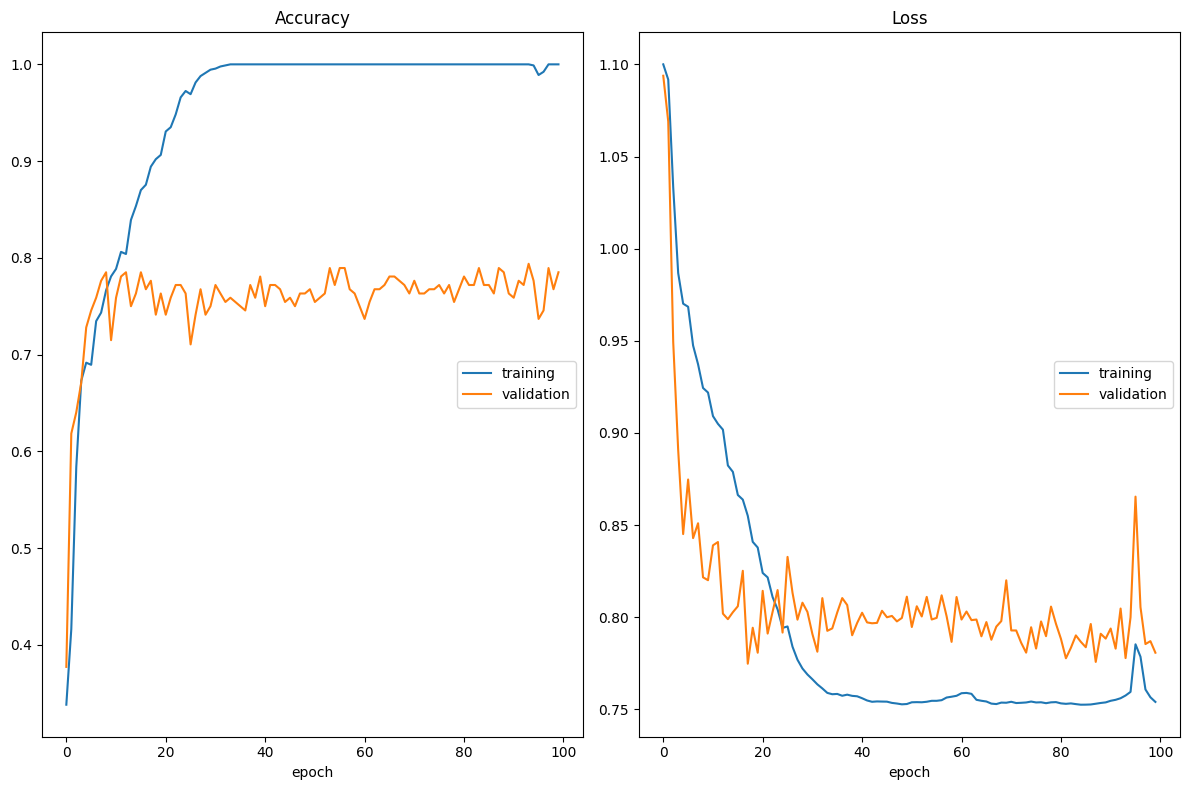

100%|██████████| 100/100 [00:48<00:00,  2.05it/s]

Accuracy
	training         	 (min:    0.338, max:    1.000, cur:    1.000)
	validation       	 (min:    0.377, max:    0.794, cur:    0.785)
Loss
	training         	 (min:    0.753, max:    1.100, cur:    0.754)
	validation       	 (min:    0.775, max:    1.094, cur:    0.781)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)

Test loss: 0.7676 | Test accuracy: 0.8000


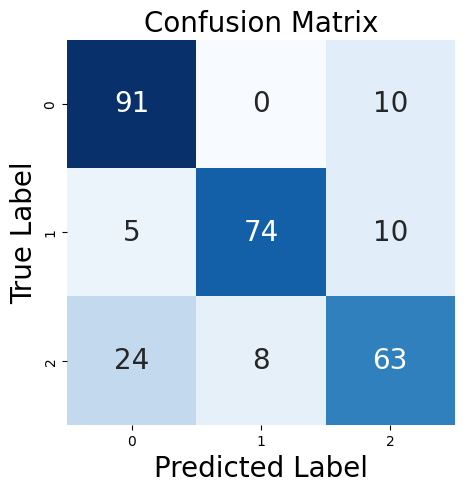

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

#### Conclusion:
**SimpleCNN looks performs well,although the validation loss is silmilar to ResNet, but the speed of training is much faster, worthy to fine-tuning it.**

### Try to add residual blocks to SimpleCNN 
**Theoritically, add residual blocks can pevent the training become worse, so I try to add residual blocks to the SimpleCNN, and hope it can performs better than plain SimpleCNN.**

In [ ]:
model = ResidualCNN()
batch_size = 16
learning_rate = 1e-3
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
sum = summary(model, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─ResidualBlock: 1-1                     [-1, 1, 32, 32]           --
|    └─Conv2d: 2-1                       [-1, 2, 32, 32]           20
|    └─Conv2d: 2-2                       [-1, 1, 32, 32]           19
├─Conv2d: 1-2                            [-1, 32, 32, 32]          320
├─MaxPool2d: 1-3                         [-1, 32, 16, 16]          --
├─ResidualBlock: 1-4                     [-1, 32, 16, 16]          --
|    └─Conv2d: 2-3                       [-1, 64, 16, 16]          18,496
|    └─Conv2d: 2-4                       [-1, 32, 16, 16]          18,464
├─Conv2d: 1-5                            [-1, 128, 16, 16]         36,992
├─MaxPool2d: 1-6                         [-1, 128, 8, 8]           --
├─Linear: 1-7                            [-1, 256]                 2,097,408
├─Linear: 1-8                            [-1, 3]                   771
Total params: 2,172,490
Trainable params: 2,172,490
Non-trainabl

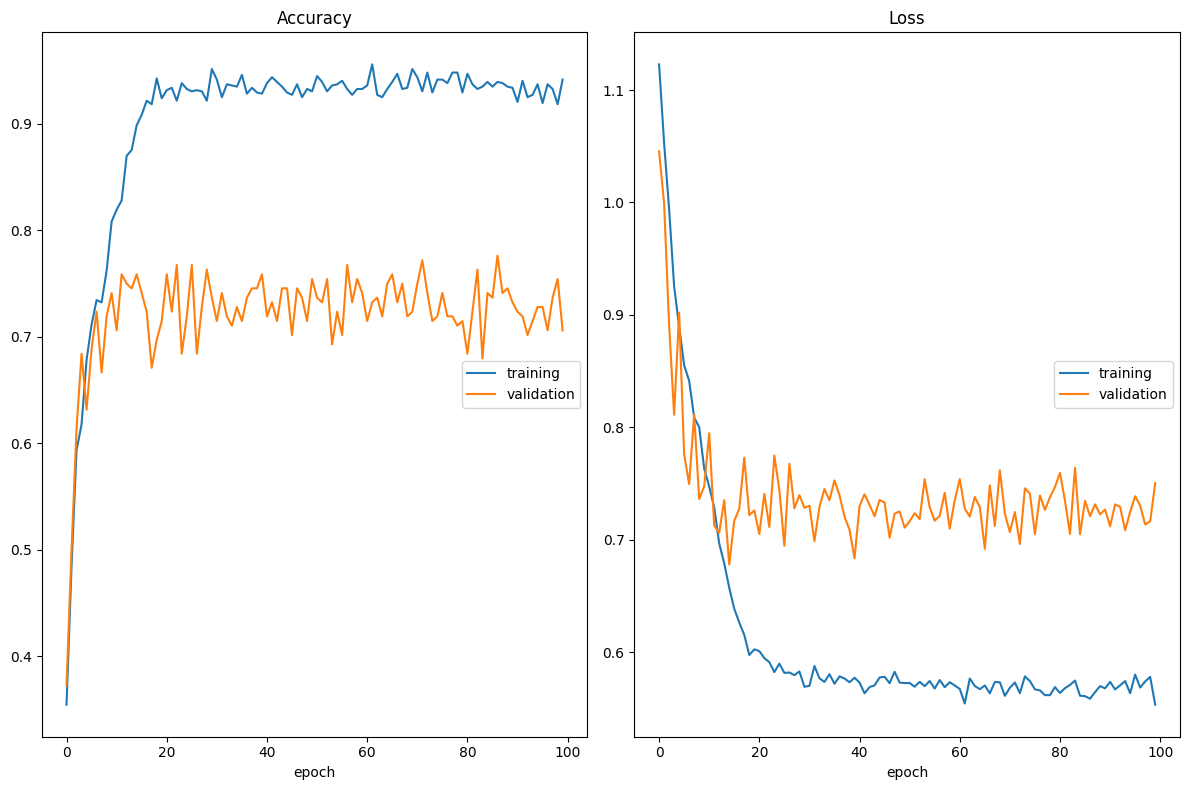

100%|██████████| 100/100 [00:53<00:00,  1.87it/s]

Accuracy
	training         	 (min:    0.355, max:    0.956, cur:    0.942)
	validation       	 (min:    0.373, max:    0.776, cur:    0.706)
Loss
	training         	 (min:    0.553, max:    1.123, cur:    0.553)
	validation       	 (min:    0.678, max:    1.046, cur:    0.750)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=False, save_frequency=50)

Test loss: 0.6788 | Test accuracy: 0.7368


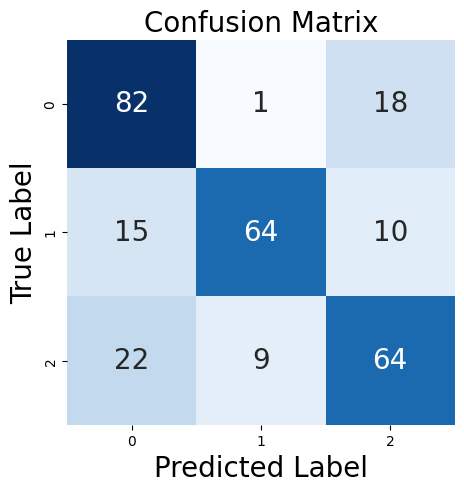

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

##### Conclusion:
**However, it looks like add residual block will not increase the model's performance, even make it performs worse. I tried several different batch size and learning rate, but the trends are the same. This may because residual block limit the ability of model to learn from new. Or it may be overfitting. So I write a new version add dropout layers, hope it can works.**

### Try Improved ResidualCNN

In [ ]:
model = ResidualCNNImproved()

batch_size = 16
learning_rate = 1e-3
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
summ = summary(model, torch.Size((1,32,32)))

Layer (type:depth-idx)                   Output Shape              Param #
├─ResidualBlock: 1-1                     [-1, 1, 32, 32]           --
|    └─Conv2d: 2-1                       [-1, 8, 32, 32]           80
|    └─Conv2d: 2-2                       [-1, 1, 32, 32]           73
├─Conv2d: 1-2                            [-1, 16, 32, 32]          160
├─Conv2d: 1-3                            [-1, 32, 32, 32]          4,640
├─MaxPool2d: 1-4                         [-1, 32, 16, 16]          --
├─Dropout2d: 1-5                         [-1, 32, 16, 16]          --
├─ResidualBlock: 1-6                     [-1, 32, 16, 16]          --
|    └─Conv2d: 2-3                       [-1, 256, 16, 16]         73,984
|    └─Conv2d: 2-4                       [-1, 32, 16, 16]          73,760
├─Conv2d: 1-7                            [-1, 64, 16, 16]          18,496
├─Conv2d: 1-8                            [-1, 128, 16, 16]         73,856
├─MaxPool2d: 1-9                         [-1, 128, 8, 8]         

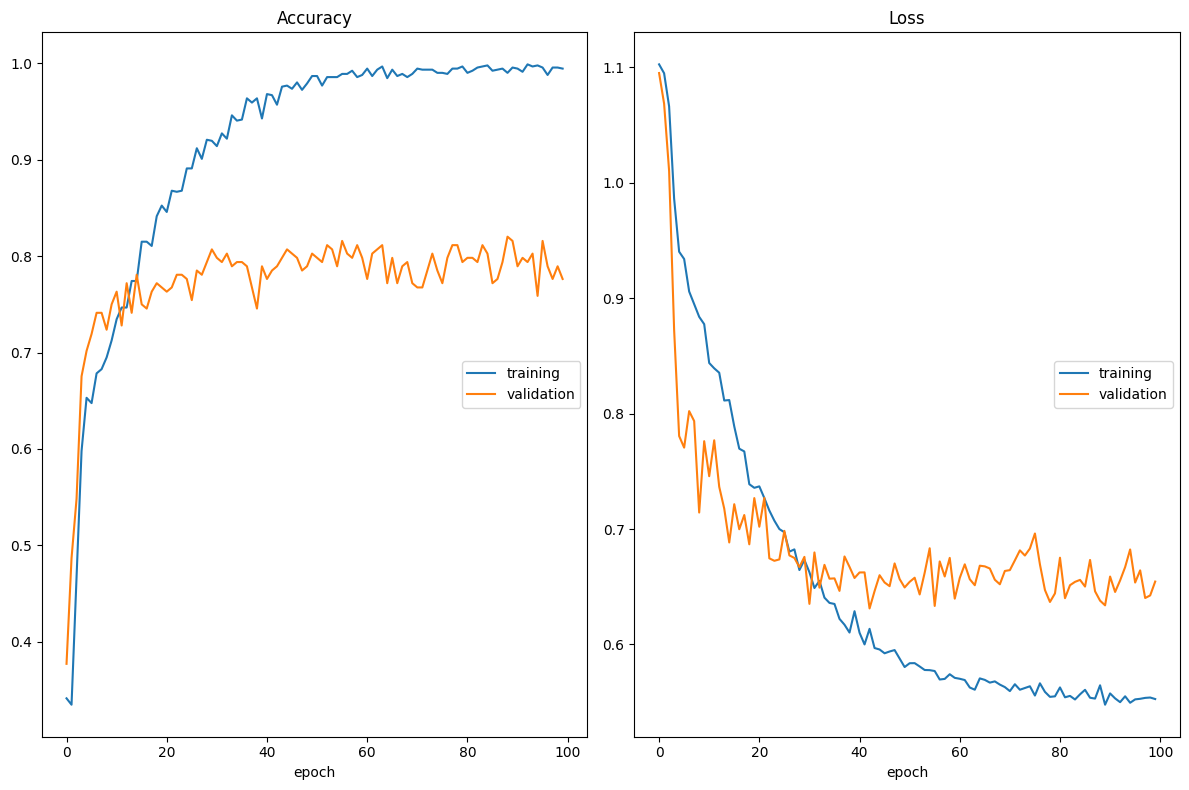

100%|██████████| 100/100 [02:05<00:00,  1.26s/it]

Accuracy
	training         	 (min:    0.335, max:    0.999, cur:    0.994)
	validation       	 (min:    0.377, max:    0.820, cur:    0.776)
Loss
	training         	 (min:    0.548, max:    1.103, cur:    0.553)
	validation       	 (min:    0.631, max:    1.095, cur:    0.654)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=False, save_frequency=50)

Test loss: 0.6288 | Test accuracy: 0.7789


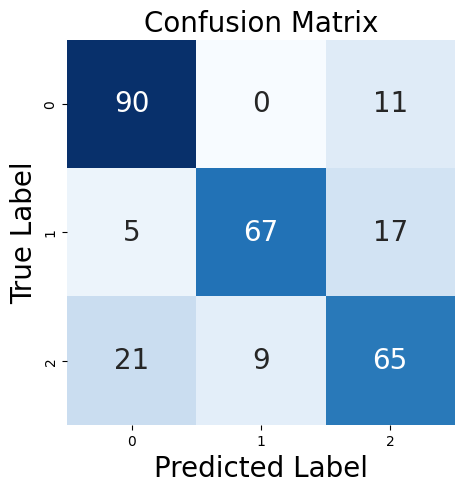

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

#### Conclusion:
**There are indeed some improvement, but just a little. Better to use plain SimpleCNN.**

#### Fine-tuning the model

In [ ]:
model = ResidualCNNImproved()

batch_size = 32
learning_rate = 1e-5
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

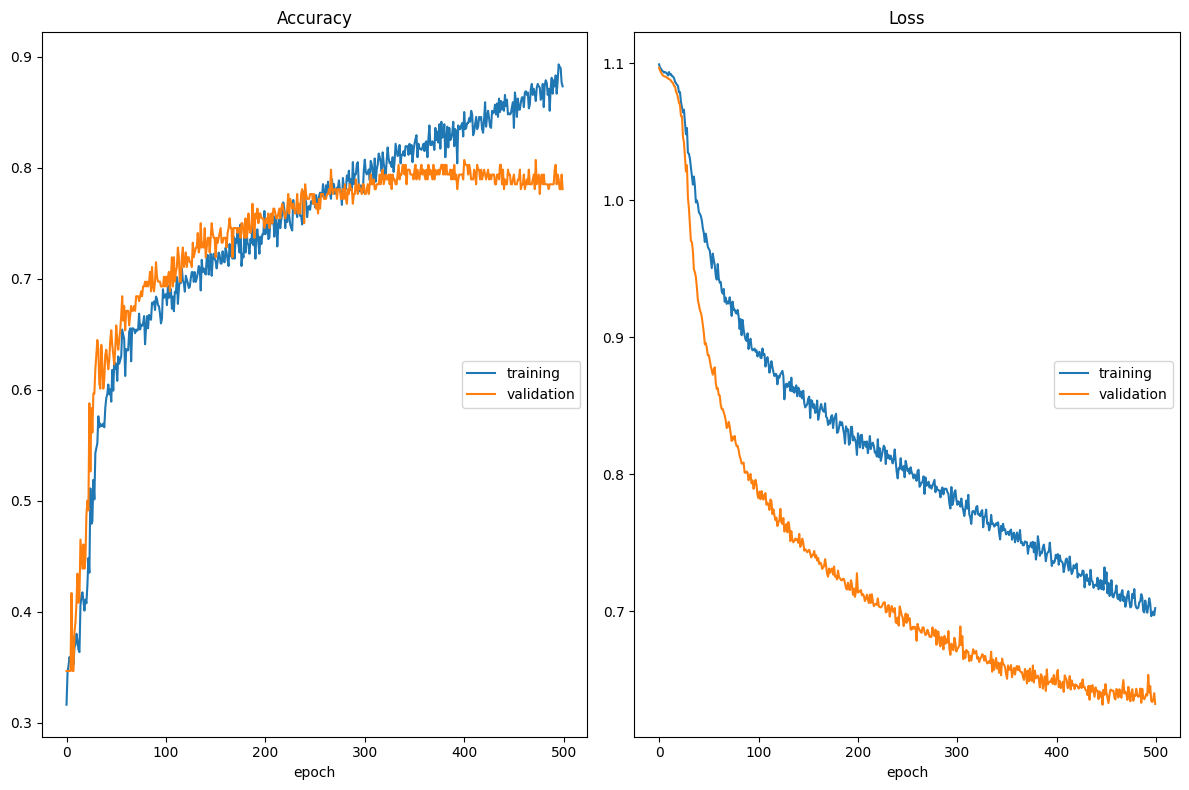

100%|██████████| 500/500 [03:55<00:00,  2.12it/s]

Accuracy
	training         	 (min:    0.316, max:    0.893, cur:    0.873)
	validation       	 (min:    0.346, max:    0.807, cur:    0.781)
Loss
	training         	 (min:    0.696, max:    1.099, cur:    0.702)
	validation       	 (min:    0.632, max:    1.097, cur:    0.632)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=500, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=False, save_frequency=50)

Test loss: 0.6251 | Test accuracy: 0.7965


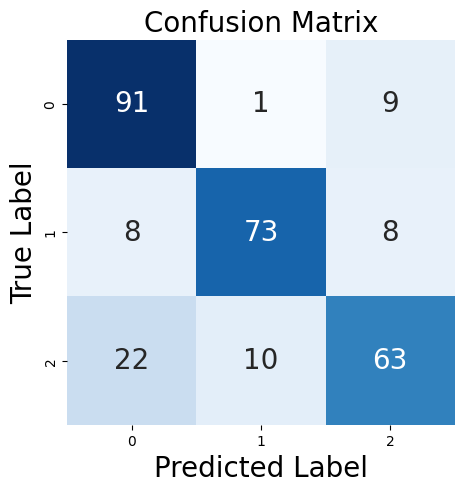

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

#### Conclusion:
**It is obvious that for a small model, a small learning rate is proper, as the model become larger, the learning rate should increase too.**

## Increase the amount of training data

**Increasing the size of datasets is an effective strategy in machine learning. Expanding the dataset helps to enhance the accuracy and generalization capability of models. This approach is particularly crucial for training complex models, as it provides more information and diversity, enabling the model to learn and adapt to new data more effectively. In summary, enlarging the dataset is a key step in boosting the performance of machine learning models.**

**I add two folders called `additional_real_hands` and `additional_GAN_hands`, each contain 300 new data. Images of `additional_real_hands` come frome the real_hands dataset in the last assessment. Images of `additional_GAN_hands` are generated by my GAN model in the last assessment.**

In [ ]:
transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.RandomHorizontalFlip(p=0.4),
                                transforms.RandomRotation(15),])
real_hands = TrainHandDataset(root='./real_hands/',label=0, transform=transform)
additional_real_hands = TrainHandDataset(root='./additional_real_hands/',label=0, transform=transform)
GAN_hands = TrainHandDataset(root='./GAN_hands/', label=2, transform=transform)
additional_GAN_hands = TrainHandDataset(root='./additional_GAN_hands/', label=2, transform=transform)
VAE_hands = TrainHandDataset(root='./VAE_hands/', label=1, transform=transform)

# Concatenate the datasets
combined_dataset = ConcatDataset([real_hands, GAN_hands, VAE_hands, additional_real_hands, additional_GAN_hands])
trainset, testset = train_test_split(combined_dataset, test_size=0.2, random_state=42)
trainset, valset = train_test_split(trainset, test_size=0.2, random_state=42)

Skip image with wrong size ./GAN_hands/GAN_hand_099.jpeg with size (32, 24)
Skip image with wrong size ./GAN_hands/GAN_hand_108.jpeg with size (32, 24)
Skip image cannot open ./GAN_hands/GAN_hand_147.jpeg: cannot identify image file './GAN_hands/GAN_hand_147.jpeg'
Skip image with wrong size ./GAN_hands/GAN_hand_171.jpeg with size (10, 32)
Skip image with wrong size ./GAN_hands/GAN_hand_217.jpeg with size (32, 24)
Skip image cannot open ./GAN_hands/GAN_hand_235.jpeg: cannot identify image file './GAN_hands/GAN_hand_235.jpeg'
Skip image with wrong size ./GAN_hands/GAN_hand_257.jpeg with size (10, 32)
Skip image cannot open ./GAN_hands/GAN_hand_273.jpeg: cannot identify image file './GAN_hands/GAN_hand_273.jpeg'
Skip image with wrong size ./GAN_hands/GAN_hand_371.jpeg with size (10, 32)
Skip image with wrong size ./GAN_hands/GAN_hand_426.jpeg with size (32, 24)
Skip image with wrong size ./GAN_hands/GAN_hand_506.jpeg with size (10, 32)
Skip image with wrong size ./VAE_hands/VAE_hand_072.j

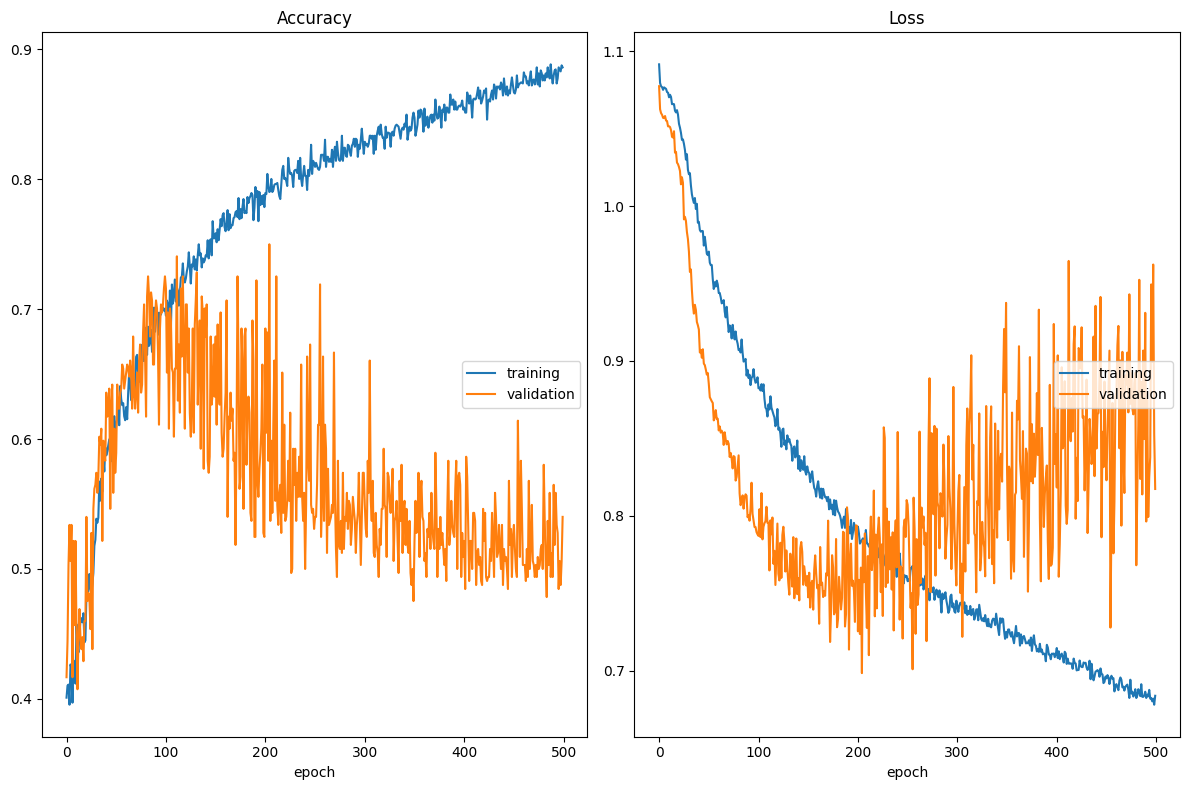

100%|██████████| 500/500 [04:58<00:00,  1.67it/s]

Accuracy
	training         	 (min:    0.396, max:    0.889, cur:    0.886)
	validation       	 (min:    0.407, max:    0.750, cur:    0.540)
Loss
	training         	 (min:    0.678, max:    1.092, cur:    0.684)
	validation       	 (min:    0.698, max:    1.077, cur:    0.817)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=500, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=False, save_frequency=50)

Test loss: 0.8176 | Test accuracy: 0.5605


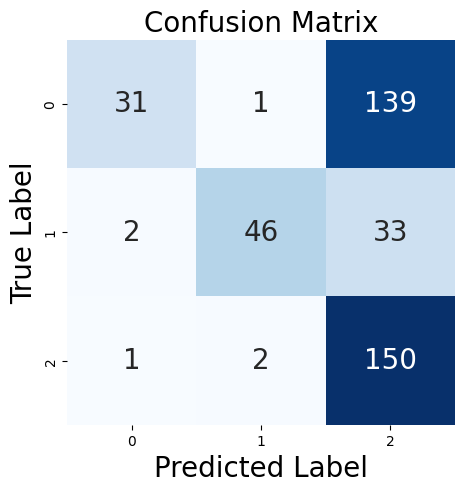

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

#### Conclusion:
**Looks like the networks does not evenly learn how to classify the images, instead it was trained to be a "GAN" classifier which means it is willing to classify most data as GAN-generated data. This may caused by the imbalenced distribution of the train_dataset.**

### SimpleCNN using larger dataset

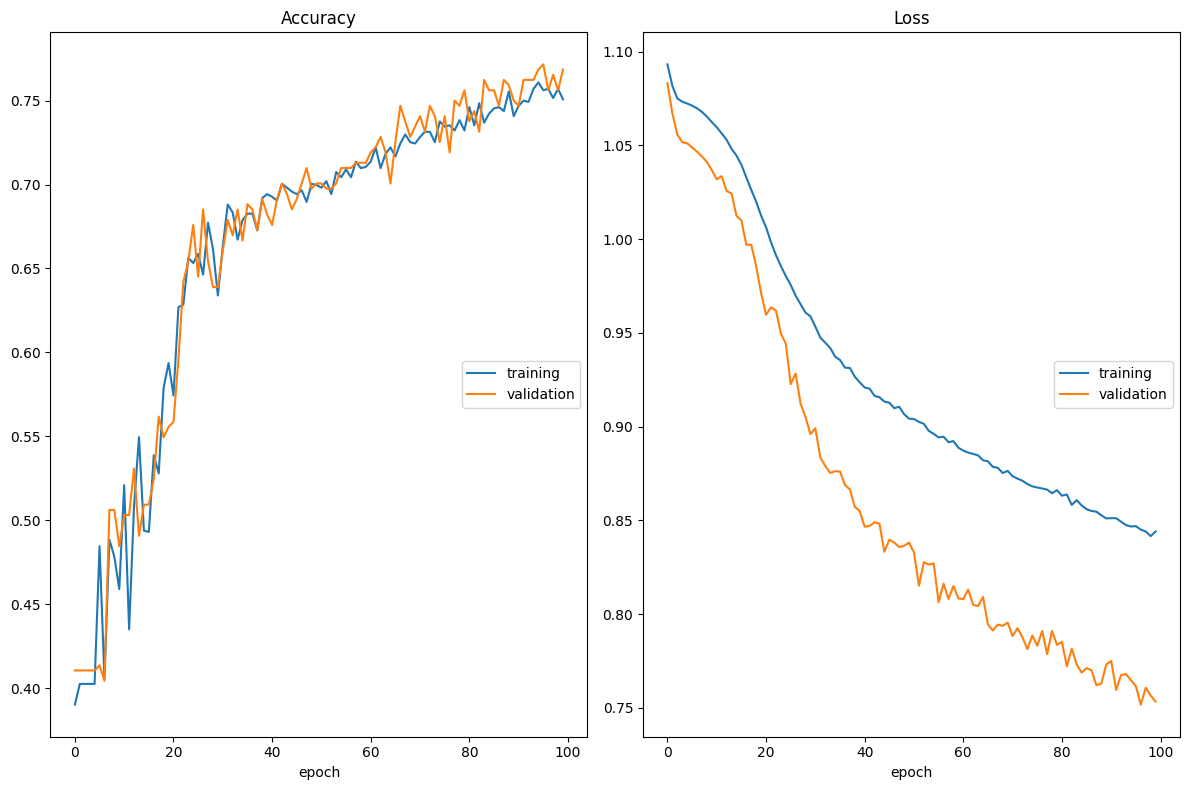

100%|██████████| 100/100 [01:30<00:00,  1.11it/s]

Accuracy
	training         	 (min:    0.390, max:    0.761, cur:    0.751)
	validation       	 (min:    0.404, max:    0.772, cur:    0.769)
Loss
	training         	 (min:    0.842, max:    1.093, cur:    0.844)
	validation       	 (min:    0.752, max:    1.083, cur:    0.753)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=False, save_frequency=50)

#### Increase the dataset seems work for SimpleCNN

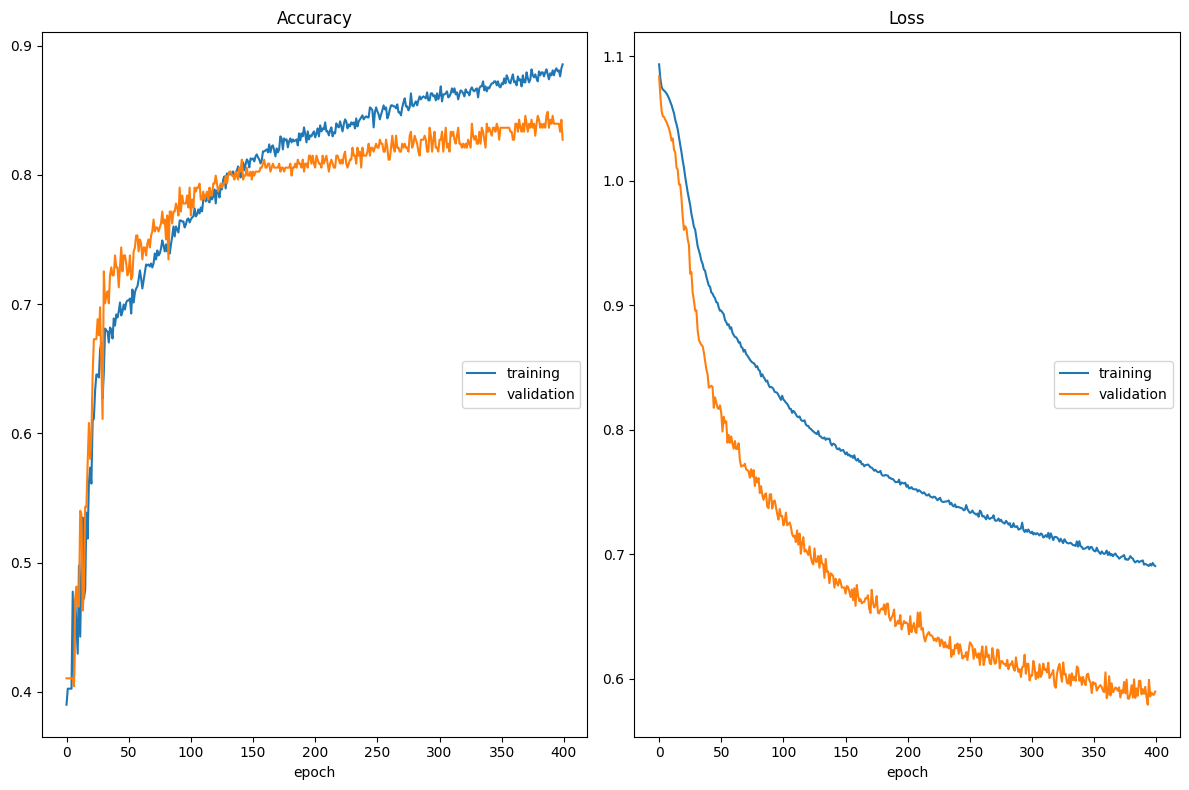

100%|██████████| 400/400 [05:46<00:00,  1.15it/s]

Accuracy
	training         	 (min:    0.390, max:    0.885, cur:    0.885)
	validation       	 (min:    0.404, max:    0.849, cur:    0.827)
Loss
	training         	 (min:    0.690, max:    1.094, cur:    0.690)
	validation       	 (min:    0.579, max:    1.084, cur:    0.589)


In [ ]:
from usages import model_train
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=400, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=False, save_frequency=50)

#### Conclusion:
**However, if reach 400 epochs, the train_accuracy and validation_accuracy, train_loss and validation_loss still begin to diverge.Looks like even use the unenlarged dataset is enough.**

# It can be concluded that complex model show poor performance in the task.
#### *So I decide to use SimpleCNN as my final model, NOT ONLY because it have a relative high performance, BUT ALSO its simple structure can make taining easy and fast, give me more chances to fine-tune it.*

### Hyperparameter tuning for SimpleCNN

#### First Try

In [ ]:
from simpleCNN import SimpleCNN
model = SimpleCNN()

batch_size = 32
learning_rate = 0.001
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Early stopping because it is obvious that the validation accuracy and loss become horizontal which means the model does not learn anything anymore.

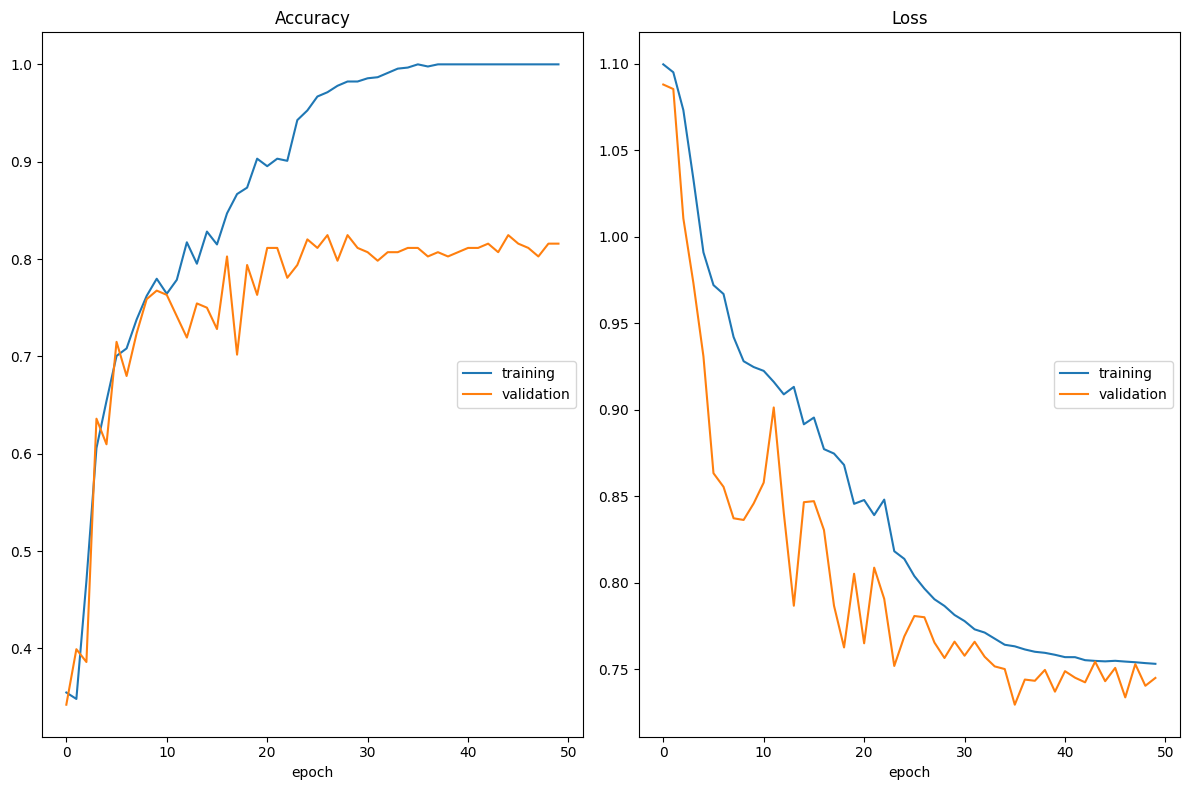

 50%|█████     | 50/100 [00:21<00:21,  2.37it/s]

Accuracy
	training         	 (min:    0.348, max:    1.000, cur:    1.000)
	validation       	 (min:    0.342, max:    0.825, cur:    0.816)
Loss
	training         	 (min:    0.753, max:    1.100, cur:    0.753)
	validation       	 (min:    0.729, max:    1.088, cur:    0.745)


KeyboardInterrupt: 

In [ ]:
from usages import model_train
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)

Test loss: 0.7614 | Test accuracy: 0.7860


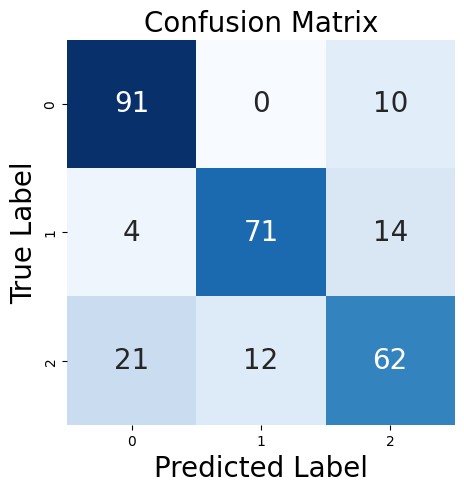

In [ ]:
from usages import model_test
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

### Using optuna to find the best hyperparameters

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# Assuming you have a dataset for training and validation
# from your_dataset import train_dataset, val_dataset

# Define your ResidualCNNImproved and ResidualBlock here

def objective(trial, train_dataset=trainset, val_dataset=valset):
    # Hyperparameters to be optimized
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Model, loss function, optimizer
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Training loop
    for epoch in tqdm(range(100)):  # You can adjust the number of epochs
        model.train()
        for data, target in train_loader:
            data = data.to(device).float()
            target = target.to(device).long()
            model = model.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.squeeze())
            loss.backward()
            optimizer.step()

        # Validation loop
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device).float()
                target = target.to(device).long()
                model = model.to(device)
                output = model(data)
                val_loss += criterion(output, target.squeeze()).item()

        # Average validation loss
        val_loss /= len(val_loader.dataset)
    
    return val_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)  # Adjust the number of trials

print("Best hyperparameters:", study.best_params)


[I 2023-12-15 01:53:33,744] A new study created in memory with name: no-name-a78cc45e-795a-4492-b708-0c6eee7d0b6b
100%|██████████| 100/100 [00:05<00:00, 16.75it/s]
[I 2023-12-15 01:53:39,730] Trial 0 finished with value: 0.006828651877871731 and parameters: {'learning_rate': 1.1805763917958655e-05, 'batch_size': 128}. Best is trial 0 with value: 0.006828651877871731.
100%|██████████| 100/100 [00:05<00:00, 18.13it/s]
[I 2023-12-15 01:53:45,260] Trial 1 finished with value: 0.006760592523374055 and parameters: {'learning_rate': 1.036923694777299e-05, 'batch_size': 128}. Best is trial 1 with value: 0.006760592523374055.
100%|██████████| 100/100 [00:05<00:00, 18.12it/s]
[I 2023-12-15 01:53:50,792] Trial 2 finished with value: 0.015419026738718936 and parameters: {'learning_rate': 0.0009181645012567043, 'batch_size': 128}. Best is trial 1 with value: 0.006760592523374055.
100%|██████████| 100/100 [00:17<00:00,  5.77it/s]
[I 2023-12-15 01:54:08,132] Trial 3 finished with value: 0.16823749767

Best hyperparameters: {'learning_rate': 3.736587050154829e-05, 'batch_size': 128}


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# Assuming you have a dataset for training and validation
# from your_dataset import train_dataset, val_dataset

# Define your ResidualCNNImproved and ResidualBlock here

def objective(trial, train_dataset=trainset, val_dataset=valset):
    # Hyperparameters to be optimized
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Model, loss function, optimizer
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Training loop
    for epoch in tqdm(range(100)):  # You can adjust the number of epochs
        model.train()
        for data, target in train_loader:
            data = data.to(device).float()
            target = target.to(device).long()
            model = model.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.squeeze())
            loss.backward()
            optimizer.step()

        # Validation loop
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device).float()
                target = target.to(device).long()
                model = model.to(device)
                output = model(data)
                val_loss += criterion(output, target.squeeze()).item()

        # Average validation loss
        val_loss /= len(val_loader.dataset)
    
    return val_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)  # Adjust the number of trials

print("Best hyperparameters:", study.best_params)


[I 2023-12-15 02:00:06,810] A new study created in memory with name: no-name-a2198770-9d48-4260-b06b-690e712f29c8
100%|██████████| 100/100 [00:17<00:00,  5.74it/s]
[I 2023-12-15 02:00:24,267] Trial 0 finished with value: 0.0717648748765912 and parameters: {'learning_rate': 0.002289631820112883, 'batch_size': 16}. Best is trial 0 with value: 0.0717648748765912.
100%|██████████| 100/100 [00:17<00:00,  5.87it/s]
[I 2023-12-15 02:00:41,325] Trial 1 finished with value: 0.1615805696499975 and parameters: {'learning_rate': 0.0010454449587298557, 'batch_size': 16}. Best is trial 0 with value: 0.0717648748765912.
100%|██████████| 100/100 [00:16<00:00,  5.90it/s]
[I 2023-12-15 02:00:58,290] Trial 2 finished with value: 0.03835038487848483 and parameters: {'learning_rate': 4.145262479211258e-05, 'batch_size': 16}. Best is trial 2 with value: 0.03835038487848483.
100%|██████████| 100/100 [00:09<00:00, 10.48it/s]
[I 2023-12-15 02:01:07,847] Trial 3 finished with value: 0.09287707429183156 and para

Best hyperparameters: {'learning_rate': 1.356593724993729e-05, 'batch_size': 64}


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# Assuming you have a dataset for training and validation
# from your_dataset import train_dataset, val_dataset

# Define your ResidualCNNImproved and ResidualBlock here

def objective(trial, train_dataset=trainset, val_dataset=valset):
    # Hyperparameters to be optimized
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Model, loss function, optimizer
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Training loop
    for epoch in tqdm(range(100)):  # You can adjust the number of epochs
        model.train()
        for data, target in train_loader:
            data = data.to(device).float()
            target = target.to(device).long()
            model = model.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.squeeze())
            loss.backward()
            optimizer.step()

        # Validation loop
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device).float()
                target = target.to(device).long()
                model = model.to(device)
                output = model(data)
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += accuracy_score(target.cpu(), predicted.cpu()) * target.size(0)

        accuracy = correct / total
    return accuracy  # Optuna maximizes this value

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)  # Adjust the number of trials

print("Best hyperparameters:", study.best_params)


[I 2023-12-15 14:42:11,154] A new study created in memory with name: no-name-035c84e4-7bd2-4266-aedd-ccc82438909b
100%|██████████| 100/100 [00:06<00:00, 15.04it/s]
[I 2023-12-15 14:42:17,817] Trial 0 finished with value: 0.7192982456140351 and parameters: {'learning_rate': 1.820992988395321e-05, 'batch_size': 128}. Best is trial 0 with value: 0.7192982456140351.
100%|██████████| 100/100 [00:06<00:00, 15.17it/s]
[I 2023-12-15 14:42:24,423] Trial 1 finished with value: 0.8201754385964912 and parameters: {'learning_rate': 0.0001949273404552101, 'batch_size': 128}. Best is trial 1 with value: 0.8201754385964912.
100%|██████████| 100/100 [00:20<00:00,  4.97it/s]
[I 2023-12-15 14:42:44,576] Trial 2 finished with value: 0.7719298245614035 and parameters: {'learning_rate': 4.020437773514875e-05, 'batch_size': 16}. Best is trial 1 with value: 0.8201754385964912.
100%|██████████| 100/100 [00:20<00:00,  4.97it/s]
[I 2023-12-15 14:43:04,701] Trial 3 finished with value: 0.7850877192982456 and para

Best hyperparameters: {'learning_rate': 0.000713818982439922, 'batch_size': 32}


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# Assuming you have a dataset for training and validation
# from your_dataset import train_dataset, val_dataset

# Define your ResidualCNNImproved and ResidualBlock here

def objective(trial, train_dataset=trainset, val_dataset=valset):
    # Hyperparameters to be optimized
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    # Model, loss function, optimizer
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Training loop
    for epoch in tqdm(range(200)):  # You can adjust the number of epochs
        model.train()
        for data, target in train_loader:
            data = data.to(device).float()
            target = target.to(device).long()
            model = model.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.squeeze())
            loss.backward()
            optimizer.step()

        # Validation loop
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device).float()
                target = target.to(device).long()
                model = model.to(device)
                output = model(data)
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += accuracy_score(target.cpu(), predicted.cpu()) * target.size(0)

        accuracy = correct / total
    return accuracy  # Optuna maximizes this value

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)  # Adjust the number of trials

print("Best hyperparameters:", study.best_params)


[I 2023-12-15 14:54:18,045] A new study created in memory with name: no-name-a2be9b82-d5dc-481a-9b3d-cf66d347ee4a
100%|██████████| 200/200 [01:12<00:00,  2.77it/s]
[I 2023-12-15 14:55:30,353] Trial 0 finished with value: 0.7675438596491229 and parameters: {'learning_rate': 0.0007418200317717982, 'batch_size': 128}. Best is trial 0 with value: 0.7675438596491229.
100%|██████████| 200/200 [01:37<00:00,  2.06it/s]
[I 2023-12-15 14:57:07,641] Trial 1 finished with value: 0.7192982456140351 and parameters: {'learning_rate': 1.3876973293465997e-05, 'batch_size': 16}. Best is trial 0 with value: 0.7675438596491229.
100%|██████████| 200/200 [01:37<00:00,  2.05it/s]
[I 2023-12-15 14:58:45,363] Trial 2 finished with value: 0.7675438596491229 and parameters: {'learning_rate': 0.0008178324604958757, 'batch_size': 16}. Best is trial 0 with value: 0.7675438596491229.
100%|██████████| 200/200 [01:16<00:00,  2.63it/s]
[I 2023-12-15 15:00:01,550] Trial 3 finished with value: 0.7675438596491229 and para

Best hyperparameters: {'learning_rate': 0.00017365163802744637, 'batch_size': 64}


#### After several iteration of optuna fine-tuning, I find the learning rate of magnitude of 1e-5 is usually picked as the best. And batch size of 32 is proper as I said in the last assessment. 

In [ ]:
from simpleCNN import SimpleCNN
model = SimpleCNN()

batch_size = 32
learning_rate = 1e-5
creterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

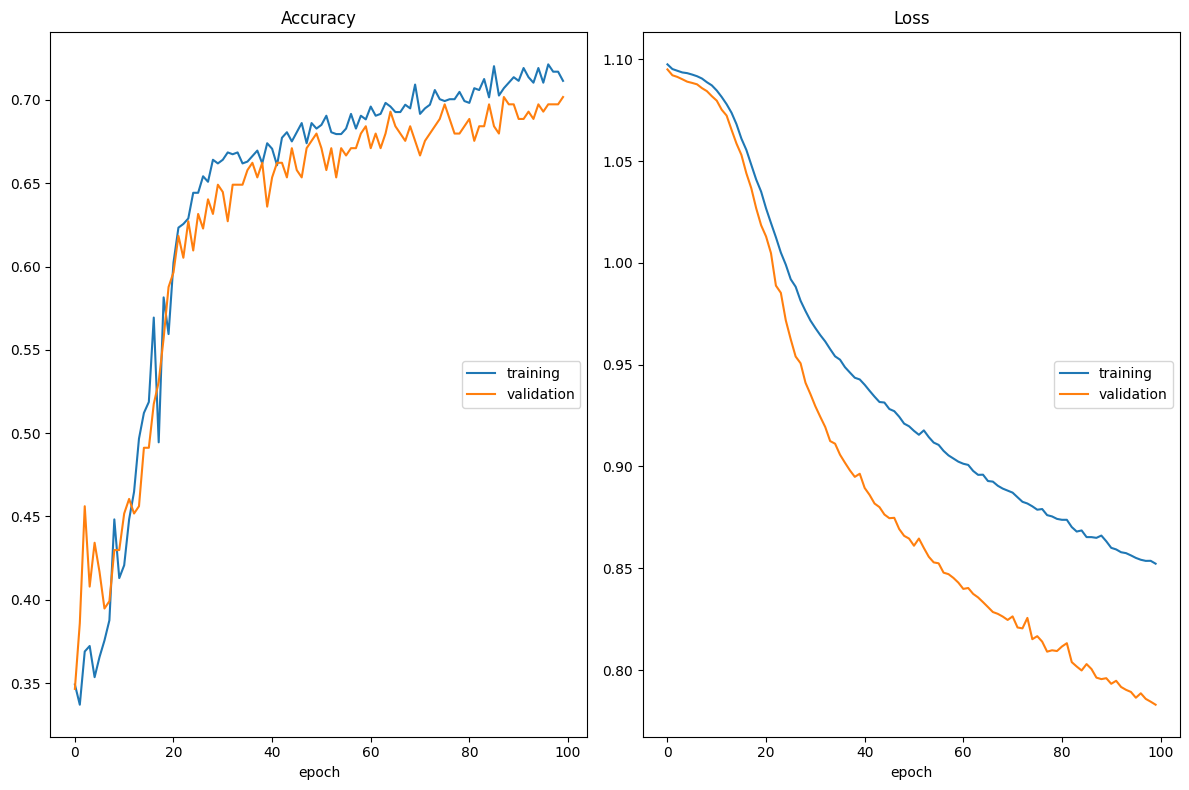

100%|██████████| 100/100 [00:41<00:00,  2.40it/s]

Accuracy
	training         	 (min:    0.337, max:    0.721, cur:    0.711)
	validation       	 (min:    0.346, max:    0.702, cur:    0.702)
Loss
	training         	 (min:    0.852, max:    1.098, cur:    0.852)
	validation       	 (min:    0.783, max:    1.095, cur:    0.783)


In [ ]:
from usages import model_train
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=100, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=False, save_frequency=50)

Test loss: 0.7207 | Test accuracy: 0.7544


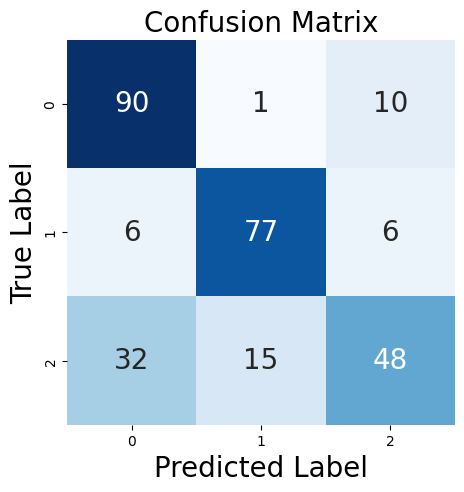

In [ ]:
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

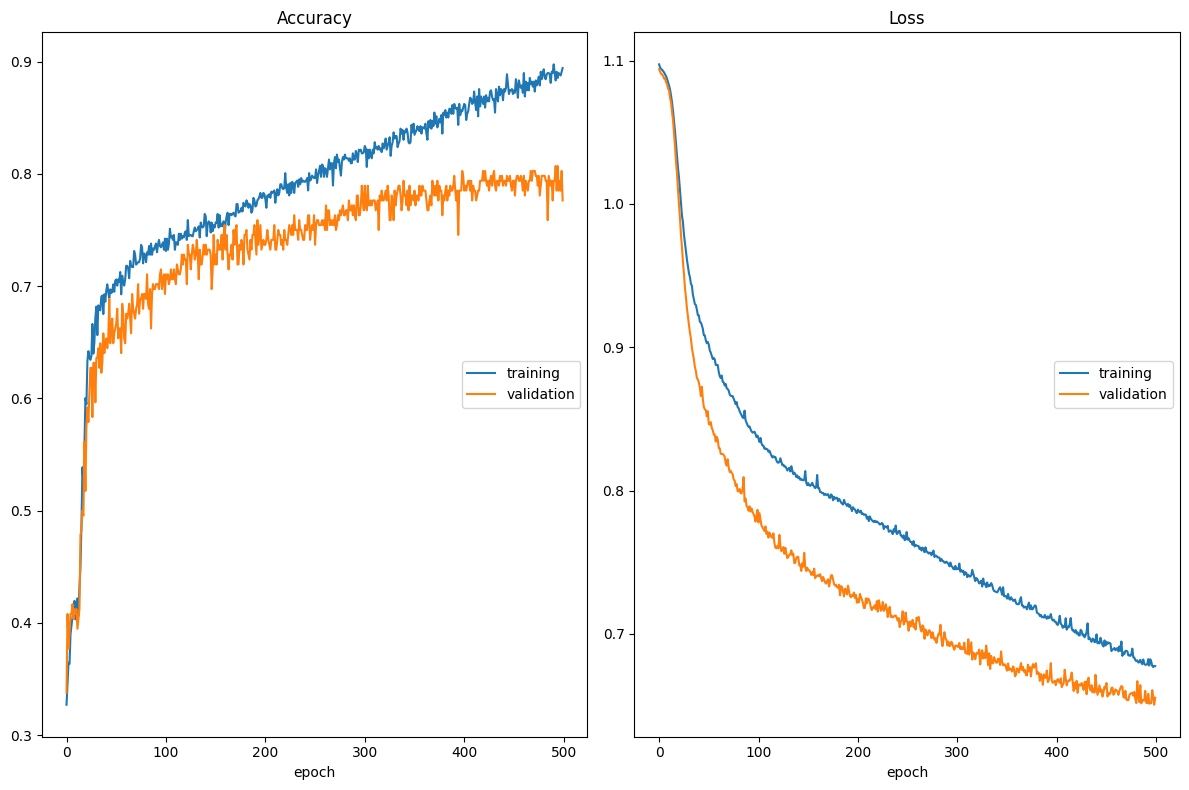

100%|██████████| 500/500 [03:19<00:00,  2.50it/s]

Accuracy
	training         	 (min:    0.327, max:    0.898, cur:    0.894)
	validation       	 (min:    0.338, max:    0.807, cur:    0.776)
Loss
	training         	 (min:    0.677, max:    1.097, cur:    0.678)
	validation       	 (min:    0.651, max:    1.094, cur:    0.655)


In [ ]:
model_train(model, optimizer, creterian, train_dataloader, val_dataloader, n_epochs=550, 
            model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=False, save_frequency=50)

- The training accuracy increases over time, which indicates that the model is learning from the training data.
- The validation accuracy also increases, but it plateaus and becomes somewhat stagnant after a certain point, which is lower than the training accuracy. This suggests that the model may be overfitting to the training data, as it performs better on the training set than on the unseen validation set.
- The training loss decreases sharply at the beginning and continues to decrease steadily, showing that the model is improving in its predictions over time on the training set.
- The validation loss mirrors the training loss initially but starts to plateau and even slightly increase towards the end. This is another indication of overfitting, as the model's improvements on the training data are not translating as effectively to the validation data.
- The behavior of the curves suggests that the model may benefit from regularization techniques to reduce overfitting, such as dropout, weight regularization, or early stopping.

Test loss: 0.6580 | Test accuracy: 0.7684


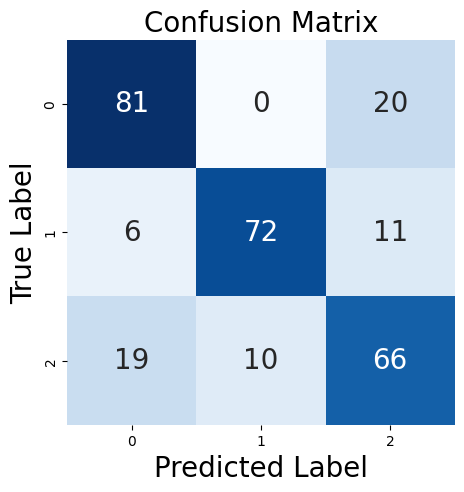

In [ ]:
from usages import model_test
y_preds, y_trues = model_test(test_loader=test_dataloader, model=model, metric=accuracy_score, criterion=nn.CrossEntropyLoss())
cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, annot_kws={"size": 20})
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.show()

### Estimate how many epochs the model can converge

In [ ]:
train_dataloader = DataLoader(combined_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

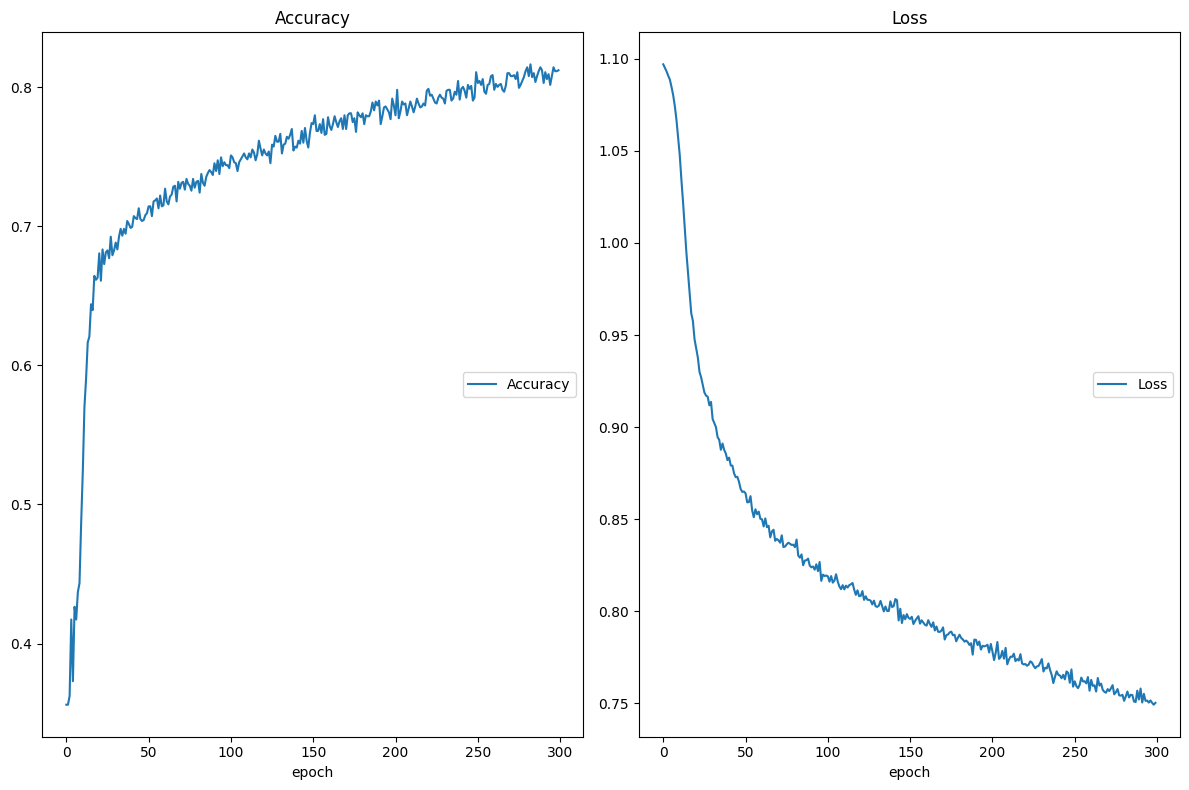

100%|██████████| 300/300 [07:29<00:00,  1.50s/it]

Accuracy
	Accuracy         	 (min:    0.356, max:    0.816, cur:    0.812)
Loss
	Loss             	 (min:    0.749, max:    1.097, cur:    0.750)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=300, model_path="./models/Classifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)   

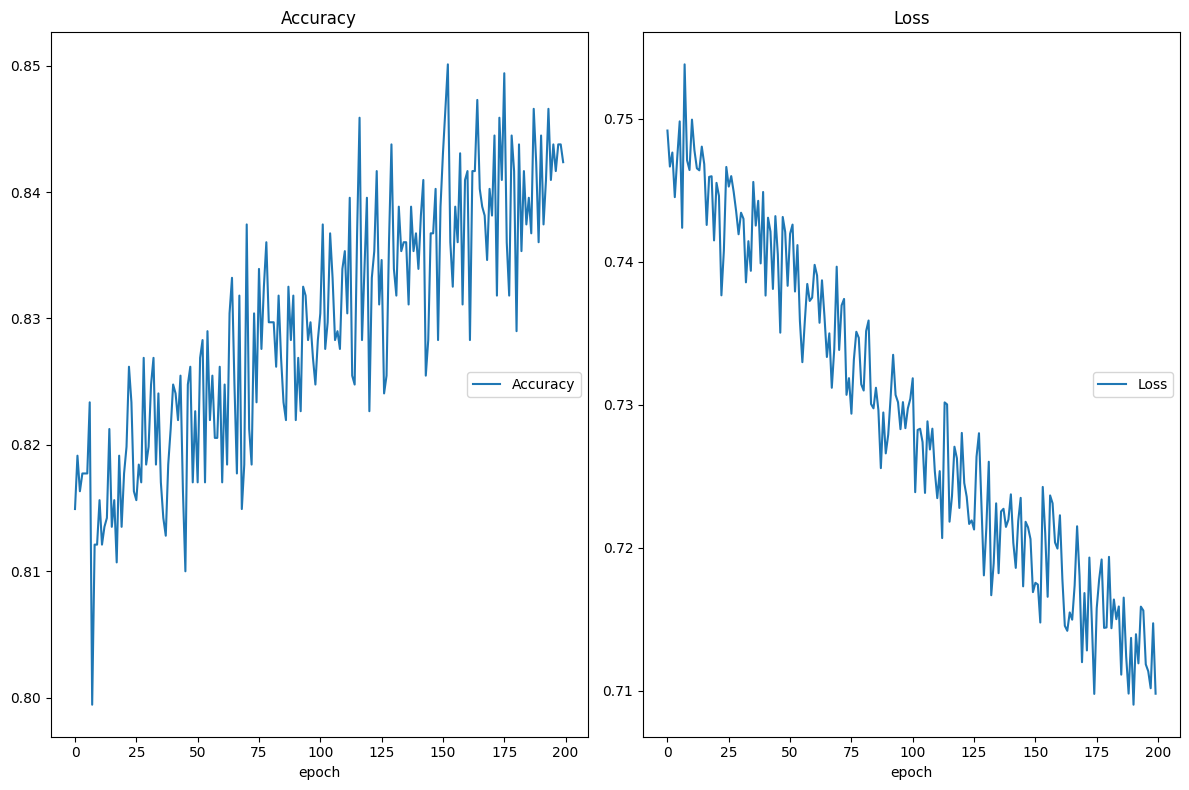

100%|██████████| 200/200 [05:03<00:00,  1.52s/it]

Accuracy
	Accuracy         	 (min:    0.799, max:    0.850, cur:    0.842)
Loss
	Loss             	 (min:    0.709, max:    0.754, cur:    0.710)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=500, model_path="./models/Classifier_{:04d}.pth", epoch_start=300, load_model=True, save_model=True, save_frequency=50)   

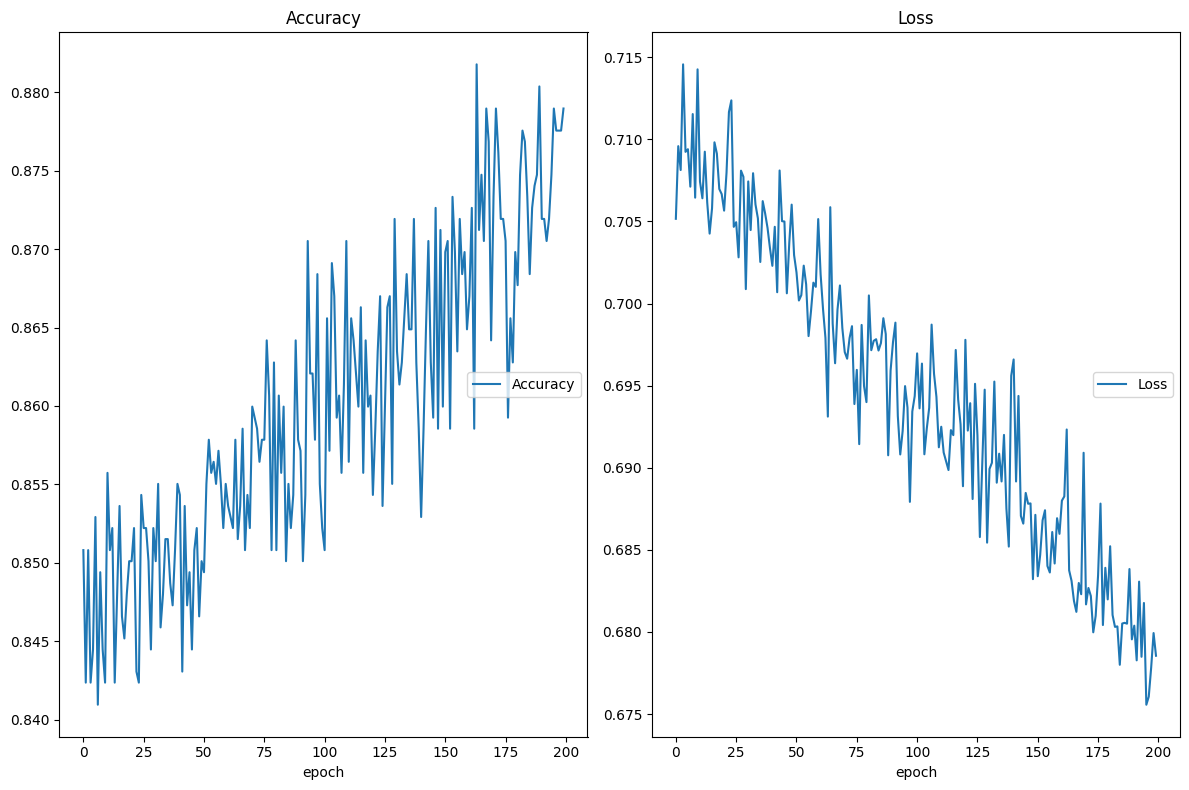

100%|██████████| 200/200 [05:00<00:00,  1.50s/it]

Accuracy
	Accuracy         	 (min:    0.841, max:    0.882, cur:    0.879)
Loss
	Loss             	 (min:    0.676, max:    0.715, cur:    0.679)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=700, model_path="./models/Classifier_{:04d}.pth", epoch_start=500, load_model=True, save_model=True, save_frequency=50)   

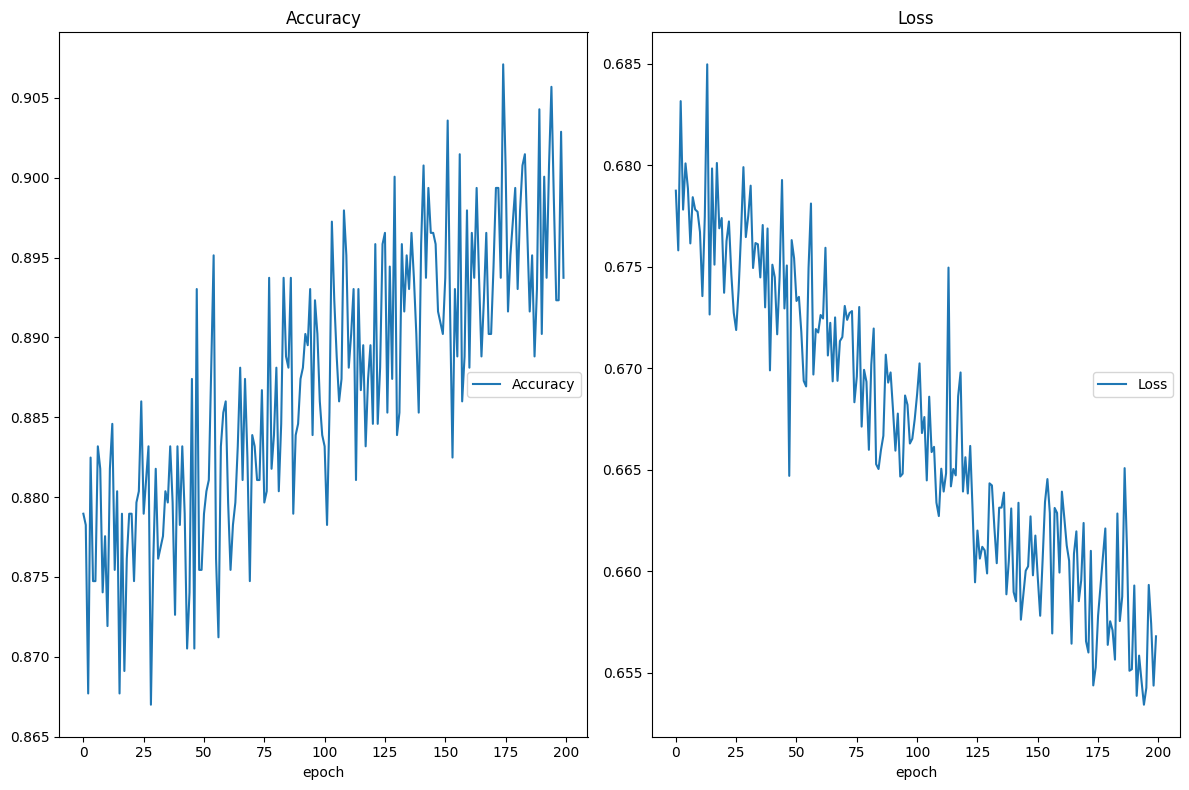

100%|██████████| 200/200 [05:04<00:00,  1.52s/it]

Accuracy
	Accuracy         	 (min:    0.867, max:    0.907, cur:    0.894)
Loss
	Loss             	 (min:    0.653, max:    0.685, cur:    0.657)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=900, model_path="./models/Classifier_{:04d}.pth", epoch_start=700, load_model=True, save_model=True, save_frequency=50)   

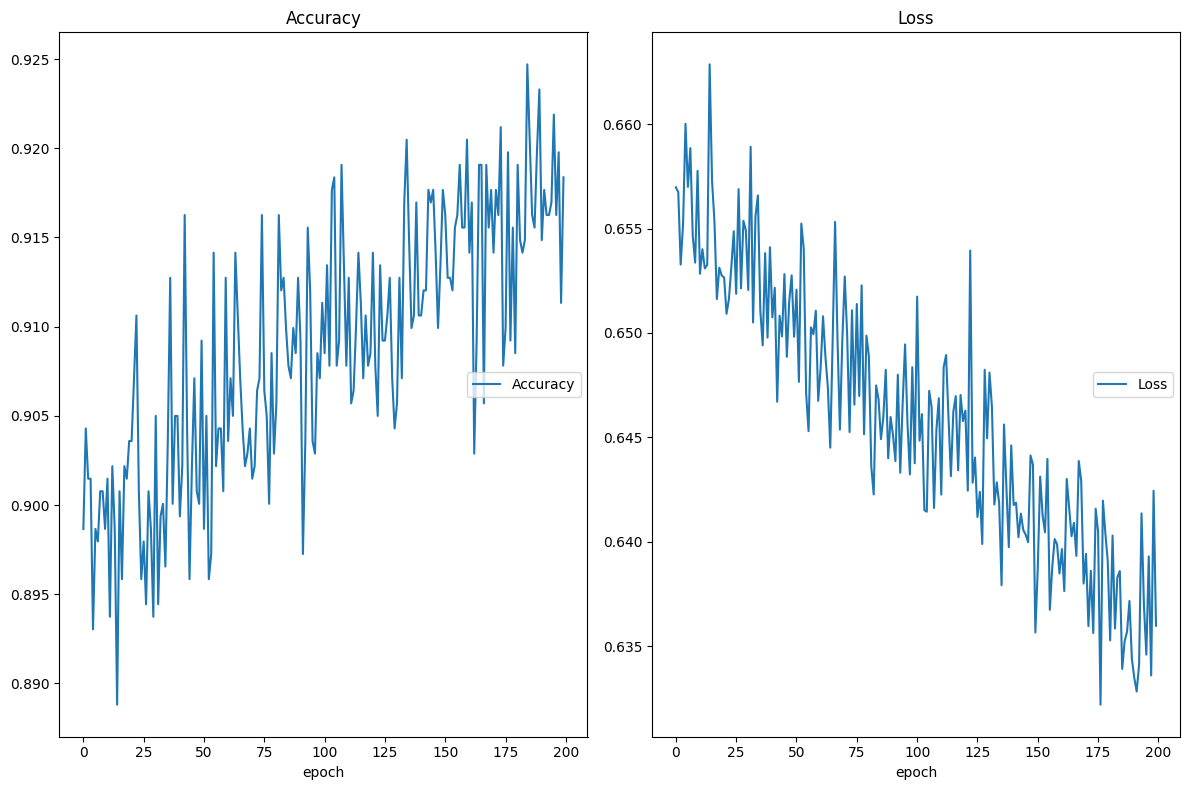

100%|██████████| 200/200 [04:56<00:00,  1.48s/it]

Accuracy
	Accuracy         	 (min:    0.889, max:    0.925, cur:    0.918)
Loss
	Loss             	 (min:    0.632, max:    0.663, cur:    0.636)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=1100, model_path="./models/Classifier_{:04d}.pth", epoch_start=900, load_model=True, save_model=True, save_frequency=50)   

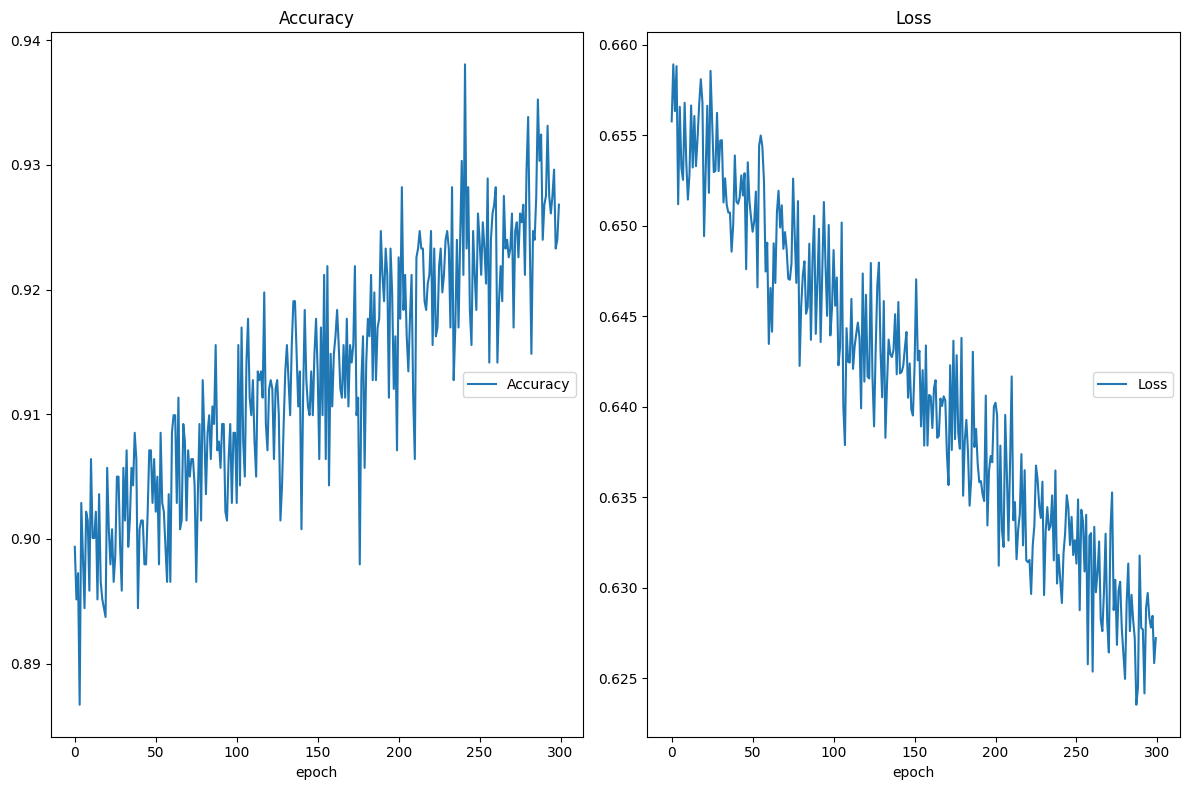

100%|██████████| 300/300 [07:30<00:00,  1.50s/it]

Accuracy
	Accuracy         	 (min:    0.887, max:    0.938, cur:    0.927)
Loss
	Loss             	 (min:    0.624, max:    0.659, cur:    0.627)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=1200, model_path="./models/Classifier_{:04d}.pth", epoch_start=900, load_model=True, save_model=True, save_frequency=50)   

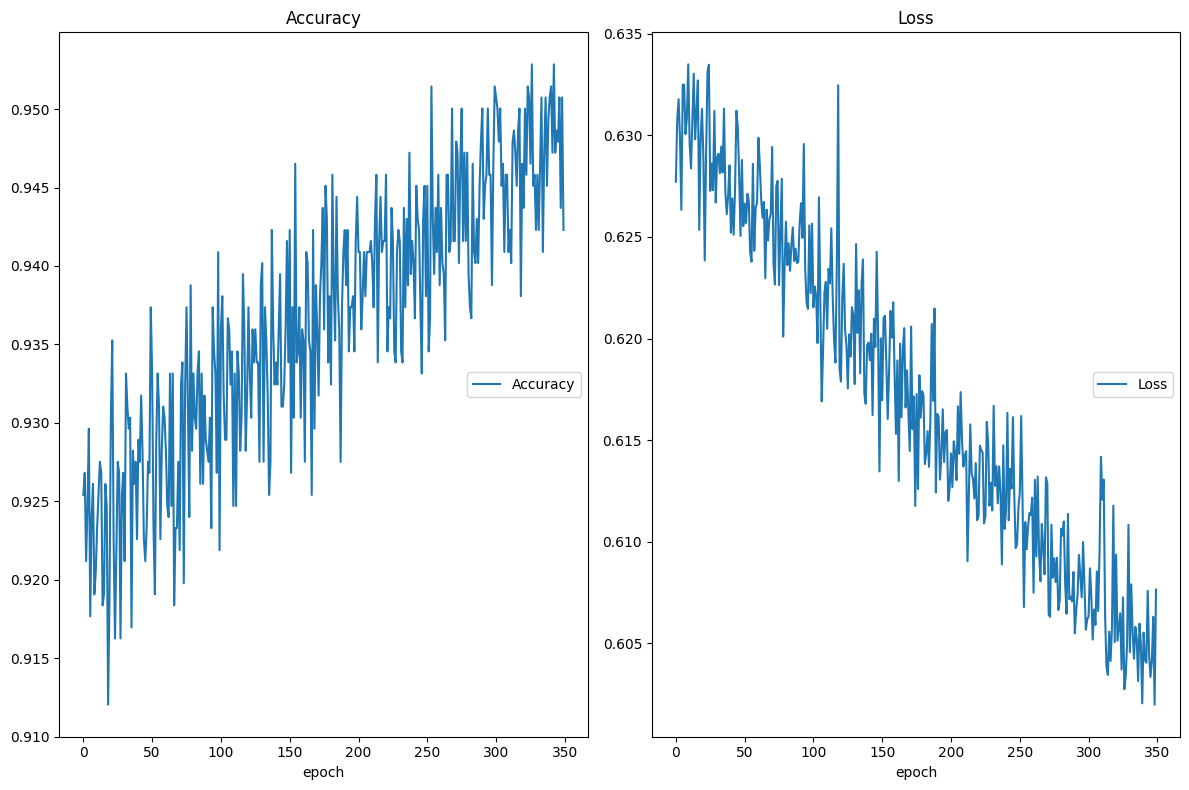

100%|██████████| 350/350 [08:45<00:00,  1.50s/it]

Accuracy
	Accuracy         	 (min:    0.912, max:    0.953, cur:    0.942)
Loss
	Loss             	 (min:    0.602, max:    0.633, cur:    0.608)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=1500, model_path="./models/Classifier_{:04d}.pth", epoch_start=1150, load_model=True, save_model=True, save_frequency=50)   

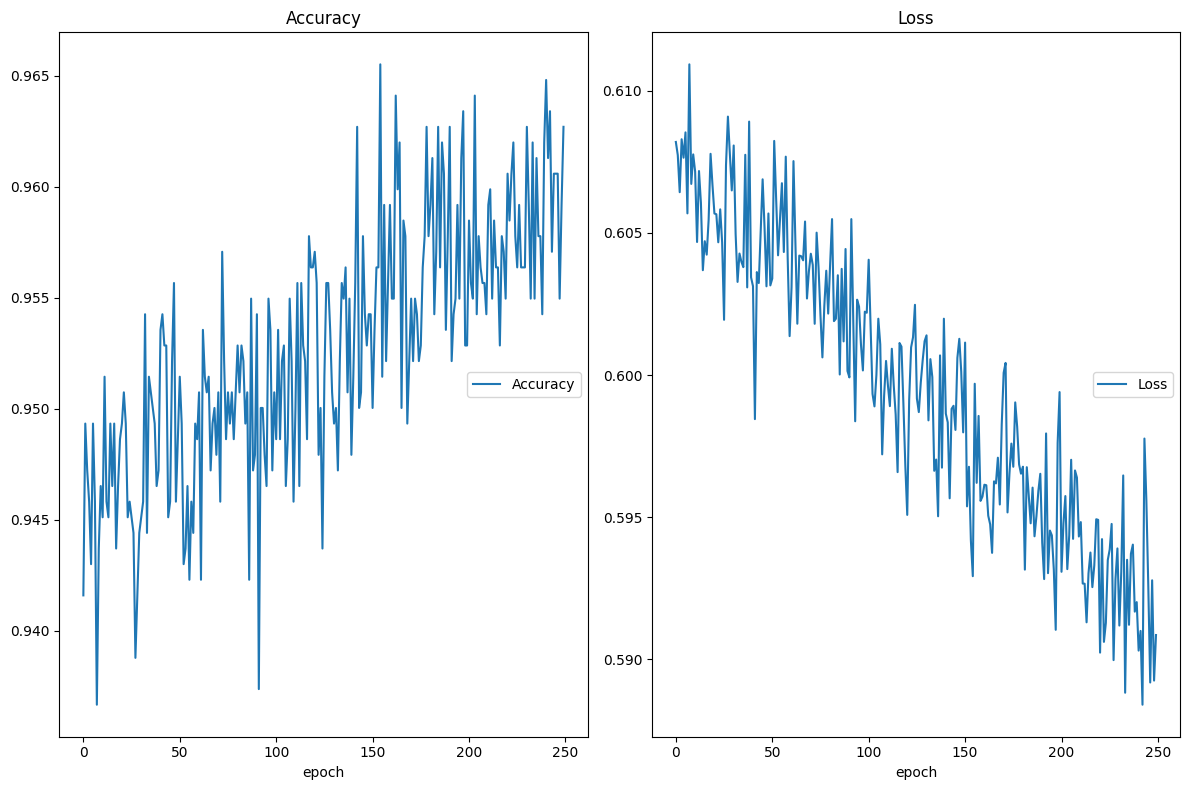

100%|██████████| 250/250 [06:14<00:00,  1.50s/it]

Accuracy
	Accuracy         	 (min:    0.937, max:    0.966, cur:    0.963)
Loss
	Loss             	 (min:    0.588, max:    0.611, cur:    0.591)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=1700, model_path="./models/Classifier_{:04d}.pth", epoch_start=1450, load_model=True, save_model=True, save_frequency=50)   

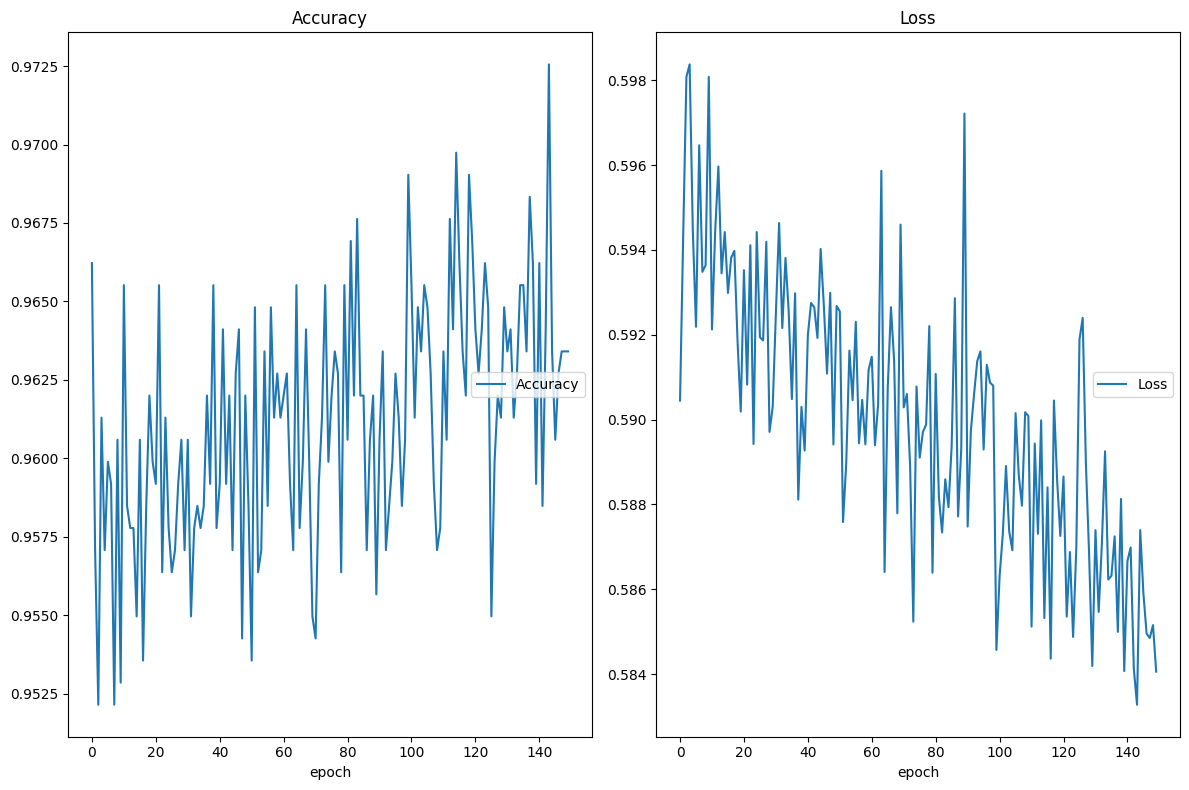

100%|██████████| 150/150 [03:50<00:00,  1.54s/it]

Accuracy
	Accuracy         	 (min:    0.952, max:    0.973, cur:    0.963)
Loss
	Loss             	 (min:    0.583, max:    0.598, cur:    0.584)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=1800, model_path="./models/Classifier_{:04d}.pth", epoch_start=1650, load_model=True, save_model=True, save_frequency=50)   

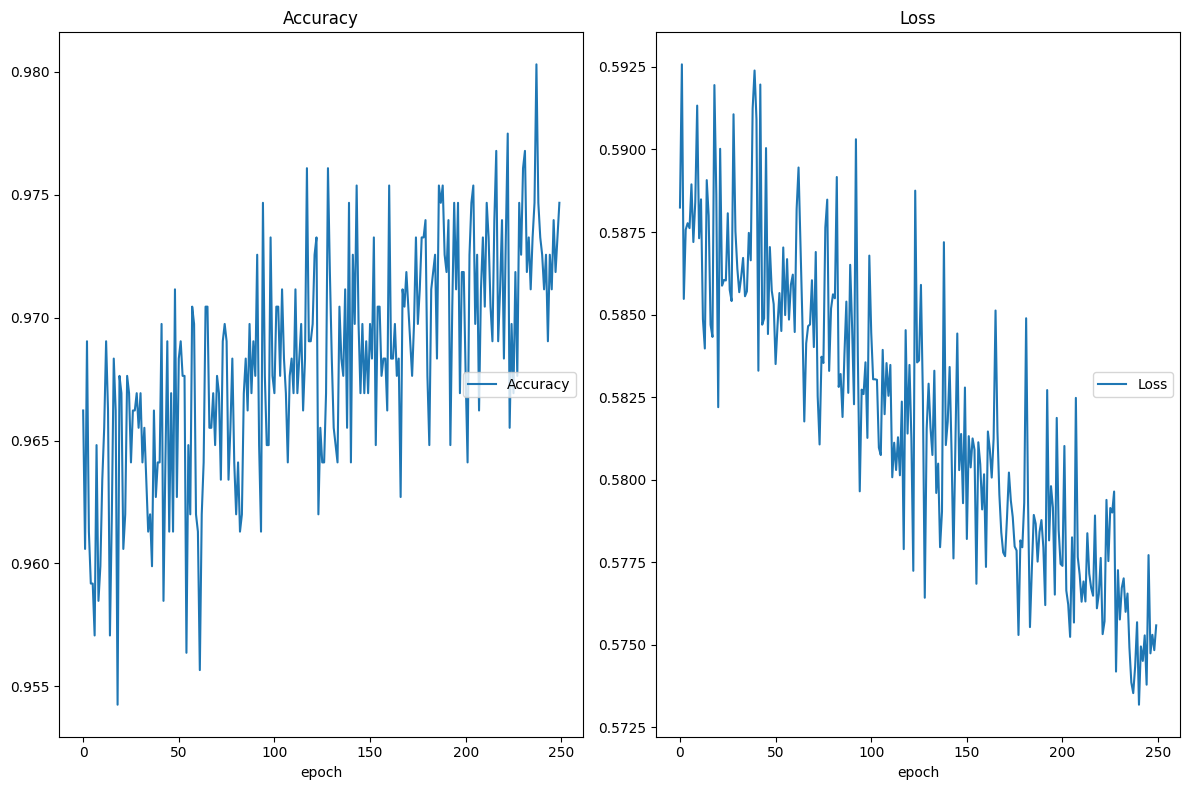

100%|██████████| 250/250 [06:14<00:00,  1.50s/it]

Accuracy
	Accuracy         	 (min:    0.954, max:    0.980, cur:    0.975)
Loss
	Loss             	 (min:    0.573, max:    0.593, cur:    0.576)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=2000, model_path="./models/Classifier_{:04d}.pth", epoch_start=1750, load_model=True, save_model=True, save_frequency=50)   

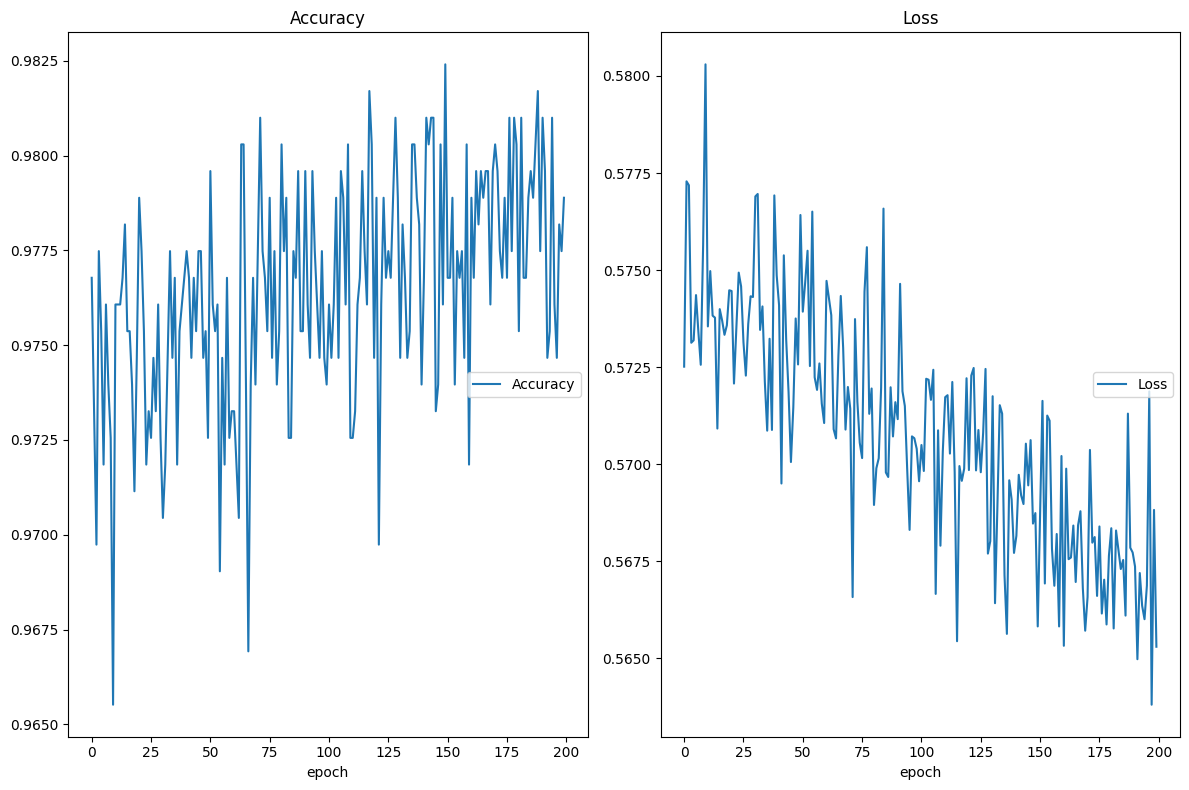

100%|██████████| 200/200 [04:54<00:00,  1.47s/it]

Accuracy
	Accuracy         	 (min:    0.966, max:    0.982, cur:    0.979)
Loss
	Loss             	 (min:    0.564, max:    0.580, cur:    0.565)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=2200, model_path="./models/Classifier_{:04d}.pth", epoch_start=2000, load_model=True, save_model=True, save_frequency=50)   

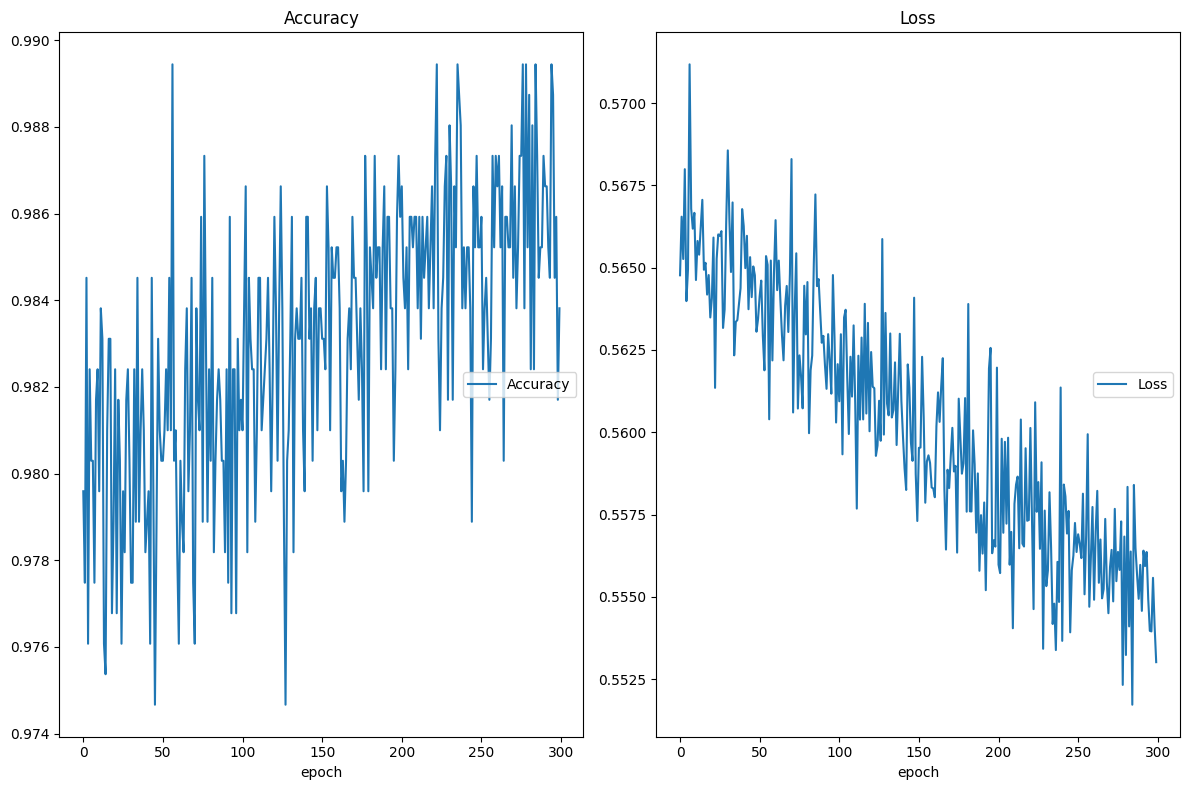

100%|██████████| 300/300 [07:38<00:00,  1.53s/it]

Accuracy
	Accuracy         	 (min:    0.975, max:    0.989, cur:    0.984)
Loss
	Loss             	 (min:    0.552, max:    0.571, cur:    0.553)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=2500, model_path="./models/Classifier_{:04d}.pth", epoch_start=2200, load_model=True, save_model=True, save_frequency=50)   

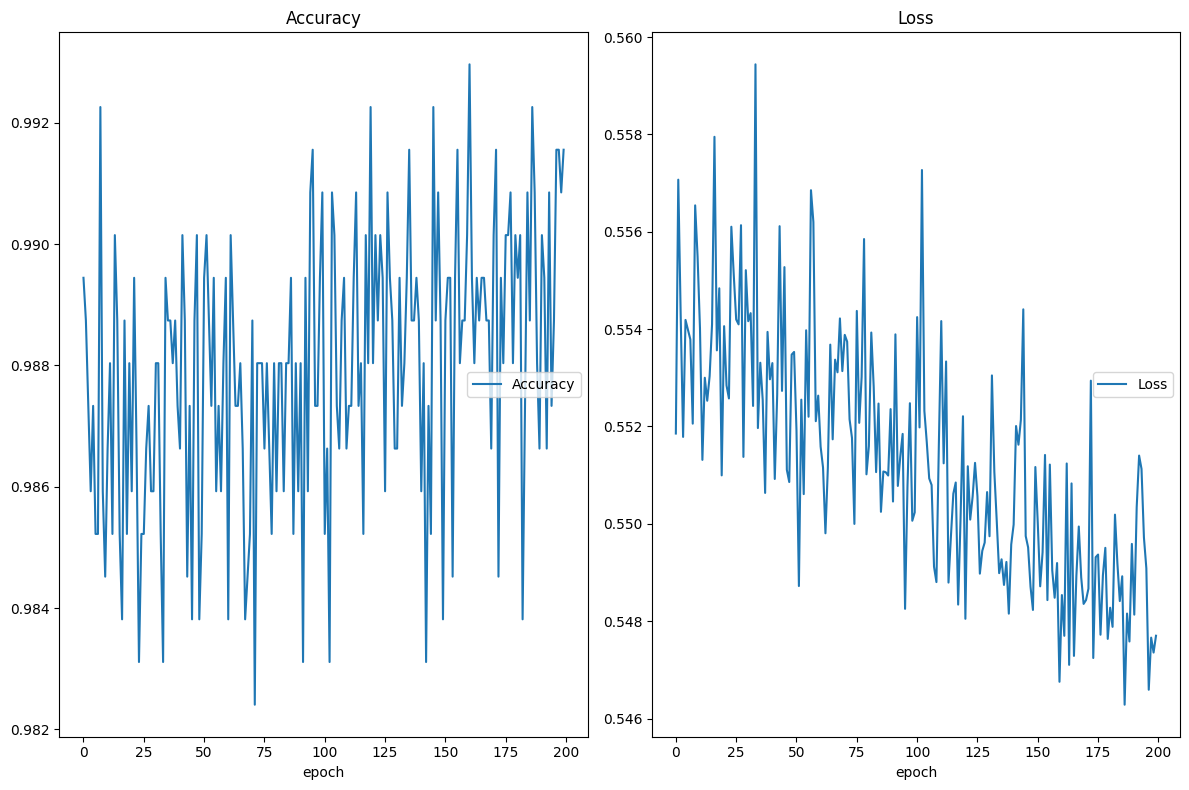

100%|██████████| 200/200 [05:02<00:00,  1.51s/it]

Accuracy
	Accuracy         	 (min:    0.982, max:    0.993, cur:    0.992)
Loss
	Loss             	 (min:    0.546, max:    0.559, cur:    0.548)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=2700, model_path="./models/Classifier_{:04d}.pth", epoch_start=2500, load_model=True, save_model=True, save_frequency=50)   

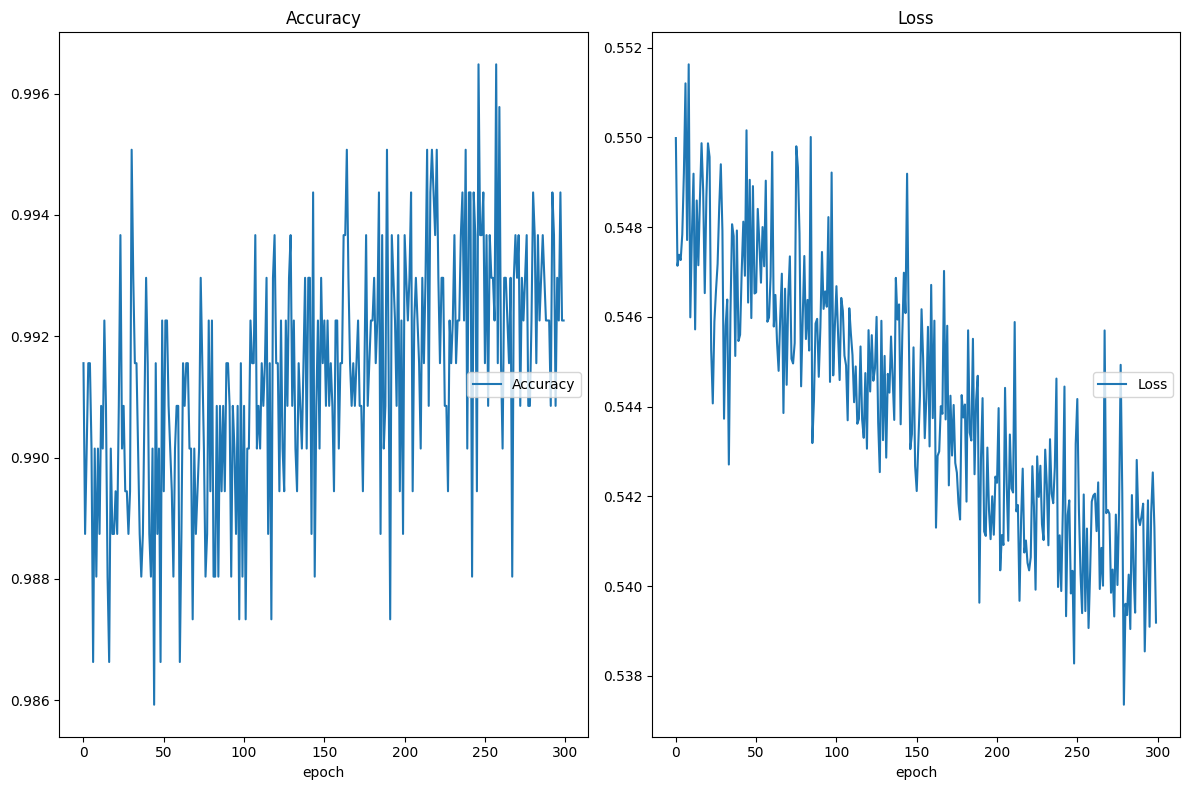

100%|██████████| 300/300 [07:56<00:00,  1.59s/it]

Accuracy
	Accuracy         	 (min:    0.986, max:    0.996, cur:    0.992)
Loss
	Loss             	 (min:    0.537, max:    0.552, cur:    0.539)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=3000, model_path="./models/Classifier_{:04d}.pth", epoch_start=2700, load_model=True, save_model=True, save_frequency=50)   

#### Conclusion:
**Around 3000 epochs the loss and accuracy will become horizontally forward, mean model no longer learn new staff. Around this point, the model should be the best. So the epoch should be set as 3000.**

### Do the edge detect

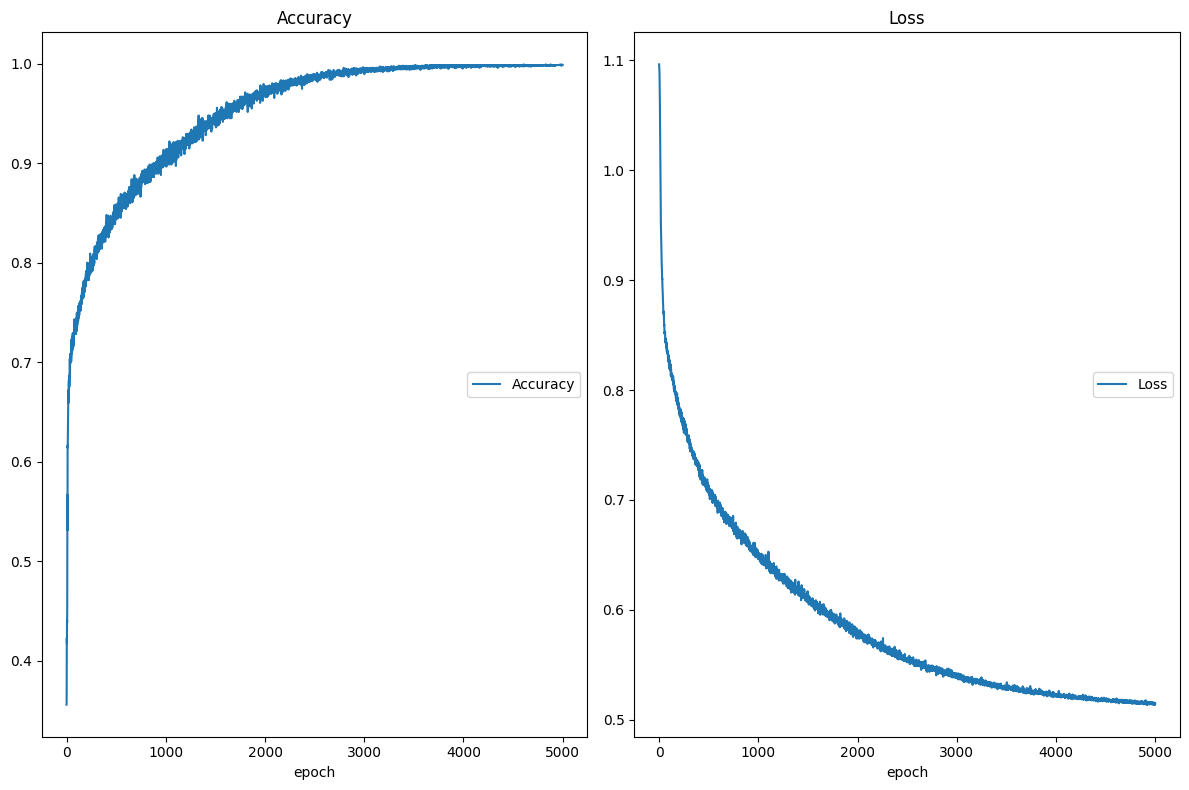

100%|██████████| 5000/5000 [2:07:46<00:00,  1.53s/it]

Accuracy
	Accuracy         	 (min:    0.356, max:    0.999, cur:    0.999)
Loss
	Loss             	 (min:    0.514, max:    1.096, cur:    0.515)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=5000, model_path="./models/CNNClassifier_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)   

#### Conclusion:
**The trend is the same as I expected, after 3000 epochs the rate of change in accuracy and loss become zero. So, 3000 is a correct epoch number.**

### Using additional data to train model again

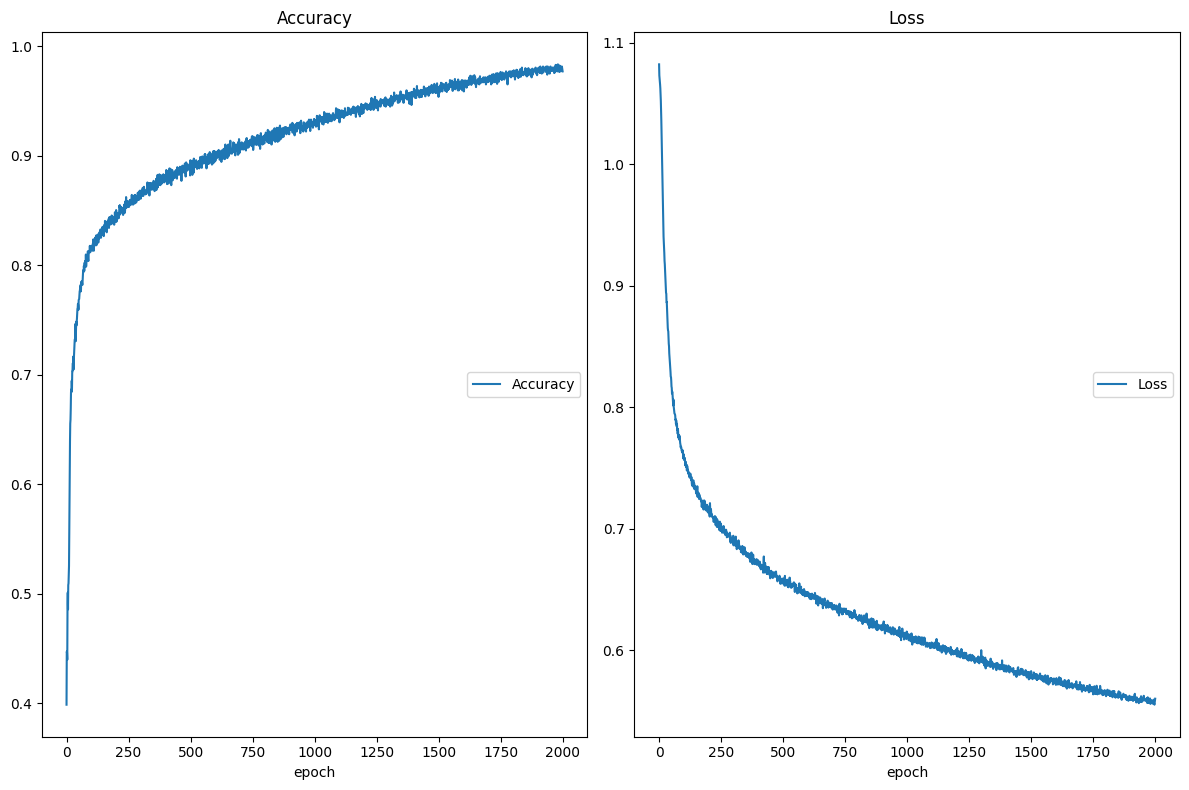

100%|██████████| 2000/2000 [1:13:46<00:00,  2.21s/it]

Accuracy
	Accuracy         	 (min:    0.399, max:    0.984, cur:    0.977)
Loss
	Loss             	 (min:    0.555, max:    1.082, cur:    0.560)


In [ ]:
from usages import model_train
model_train = model_train(model, optimizer, creterian, train_dataloader, n_epochs=2000, model_path="./models/CNNClassifierwithadddata_{:04d}.pth", epoch_start=0, load_model=False, save_model=True, save_frequency=50)   

#### Conclusion:
**Obviously the larger datasets does not improve the model a lot, the shapes are almost the same as previous ones, this might be the disadvantage of my model, which is too simple to learn more advance knowledges.**